In [18]:
import ezc3d
walk_slow = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Walk-001/pose_filt_0.c3d")
walk_fast = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Walk-002/pose_filt_0.c3d")
hop_single = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/HopSingle-001/pose_filt_0.c3d")
cmj_1 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/CMJ-001/pose_filt_0.c3d")
cmj_2 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/CMJ-002/pose_filt_0.c3d")
cmj_3 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/CMJ-003/pose_filt_0.c3d")
triple_hop_1 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/HopTriple-001/pose_filt_0.c3d")
triple_hop_2 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/HopTriple-002/pose_filt_0.c3d")
pistol_1 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Pistol-001/pose_filt_0.c3d")
pistol_2 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Pistol-002/pose_filt_0.c3d")
squat_1 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Squat001/pose_filt_0.c3d")
squat_2 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Squat001-000/pose_filt_0.c3d")
jog = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Jog-001/pose_filt_0.c3d")

import numpy as np

import matplotlib.pyplot as plt

labels = walk_slow['parameters']['ROTATION']['LABELS']['value'] # List of position/rotation names

=== EXTRACTING SQUAT DATA ===
Rotation data shape: (4, 4, 19, 512)
Structure: [4x4 matrix, 19 joints, 547 frames]
Extracted 19 joints

Extracted joints and their data:
  worldbody: (512, 4, 4) (frames, 4, 4)
  pelvis: (512, 4, 4) (frames, 4, 4)
  l_thigh: (512, 4, 4) (frames, 4, 4)
  l_shank: (512, 4, 4) (frames, 4, 4)
  l_foot: (512, 4, 4) (frames, 4, 4)
  l_toes: (512, 4, 4) (frames, 4, 4)
  r_thigh: (512, 4, 4) (frames, 4, 4)
  r_shank: (512, 4, 4) (frames, 4, 4)
  r_foot: (512, 4, 4) (frames, 4, 4)
  r_toes: (512, 4, 4) (frames, 4, 4)
  head: (512, 4, 4) (frames, 4, 4)
  torso: (512, 4, 4) (frames, 4, 4)
  l_uarm: (512, 4, 4) (frames, 4, 4)
  l_larm: (512, 4, 4) (frames, 4, 4)
  l_hand: (512, 4, 4) (frames, 4, 4)
  r_uarm: (512, 4, 4) (frames, 4, 4)
  r_larm: (512, 4, 4) (frames, 4, 4)
  r_hand: (512, 4, 4) (frames, 4, 4)
  pelvis_shifted: (512, 4, 4) (frames, 4, 4)

Position data summary:
  worldbody: (512, 3) - Range: X:[0,0] Y:[0,0] Z:[0,0]
  pelvis: (512, 3) - Range: X:[298,379

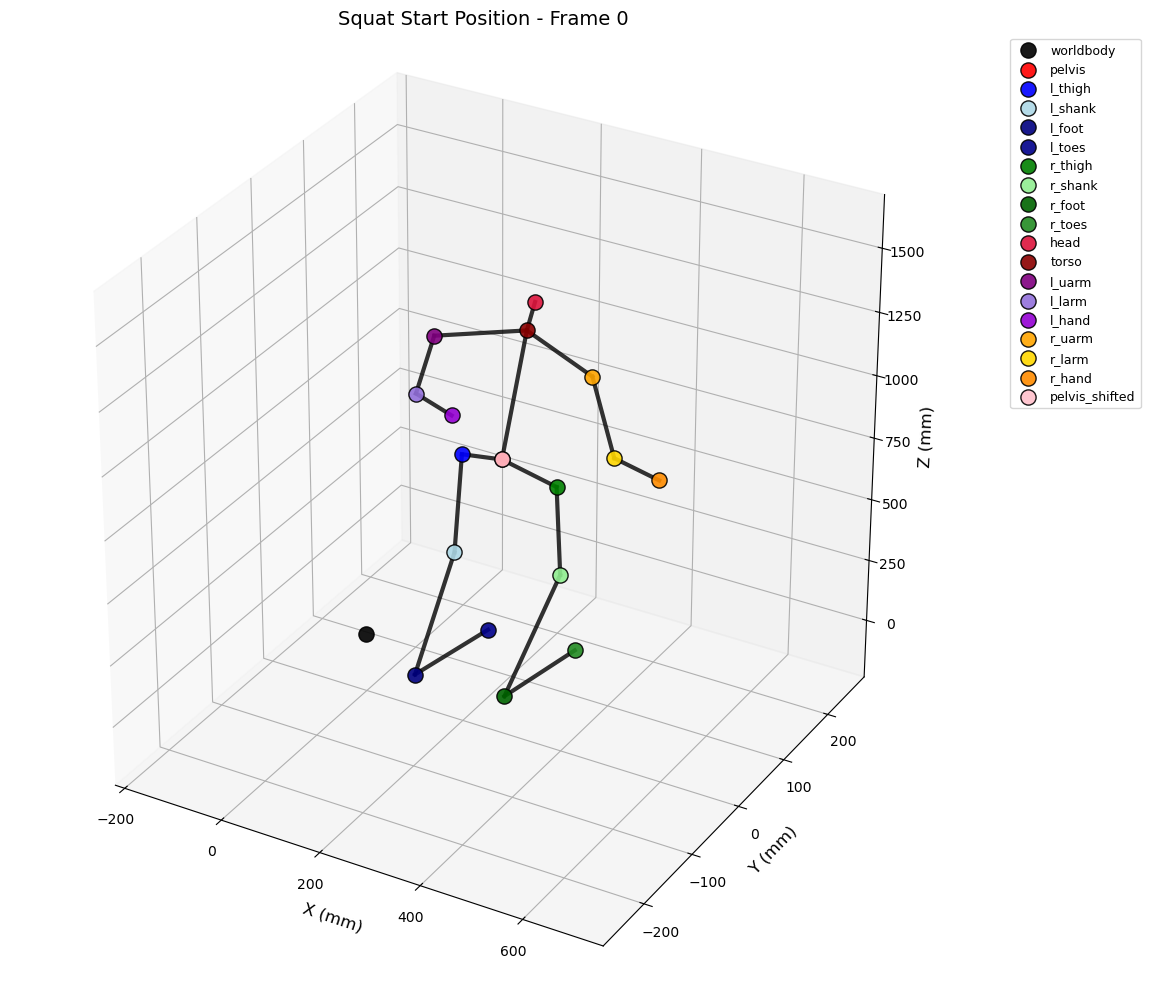


=== SQUAT ANALYSIS ===
Starting height: 924.55 mm
Maximum height: 958.78 mm
Minimum height: 522.73 mm
Total squat depth: 436.05 mm
Deepest point at frame: 246
Total frames: 512


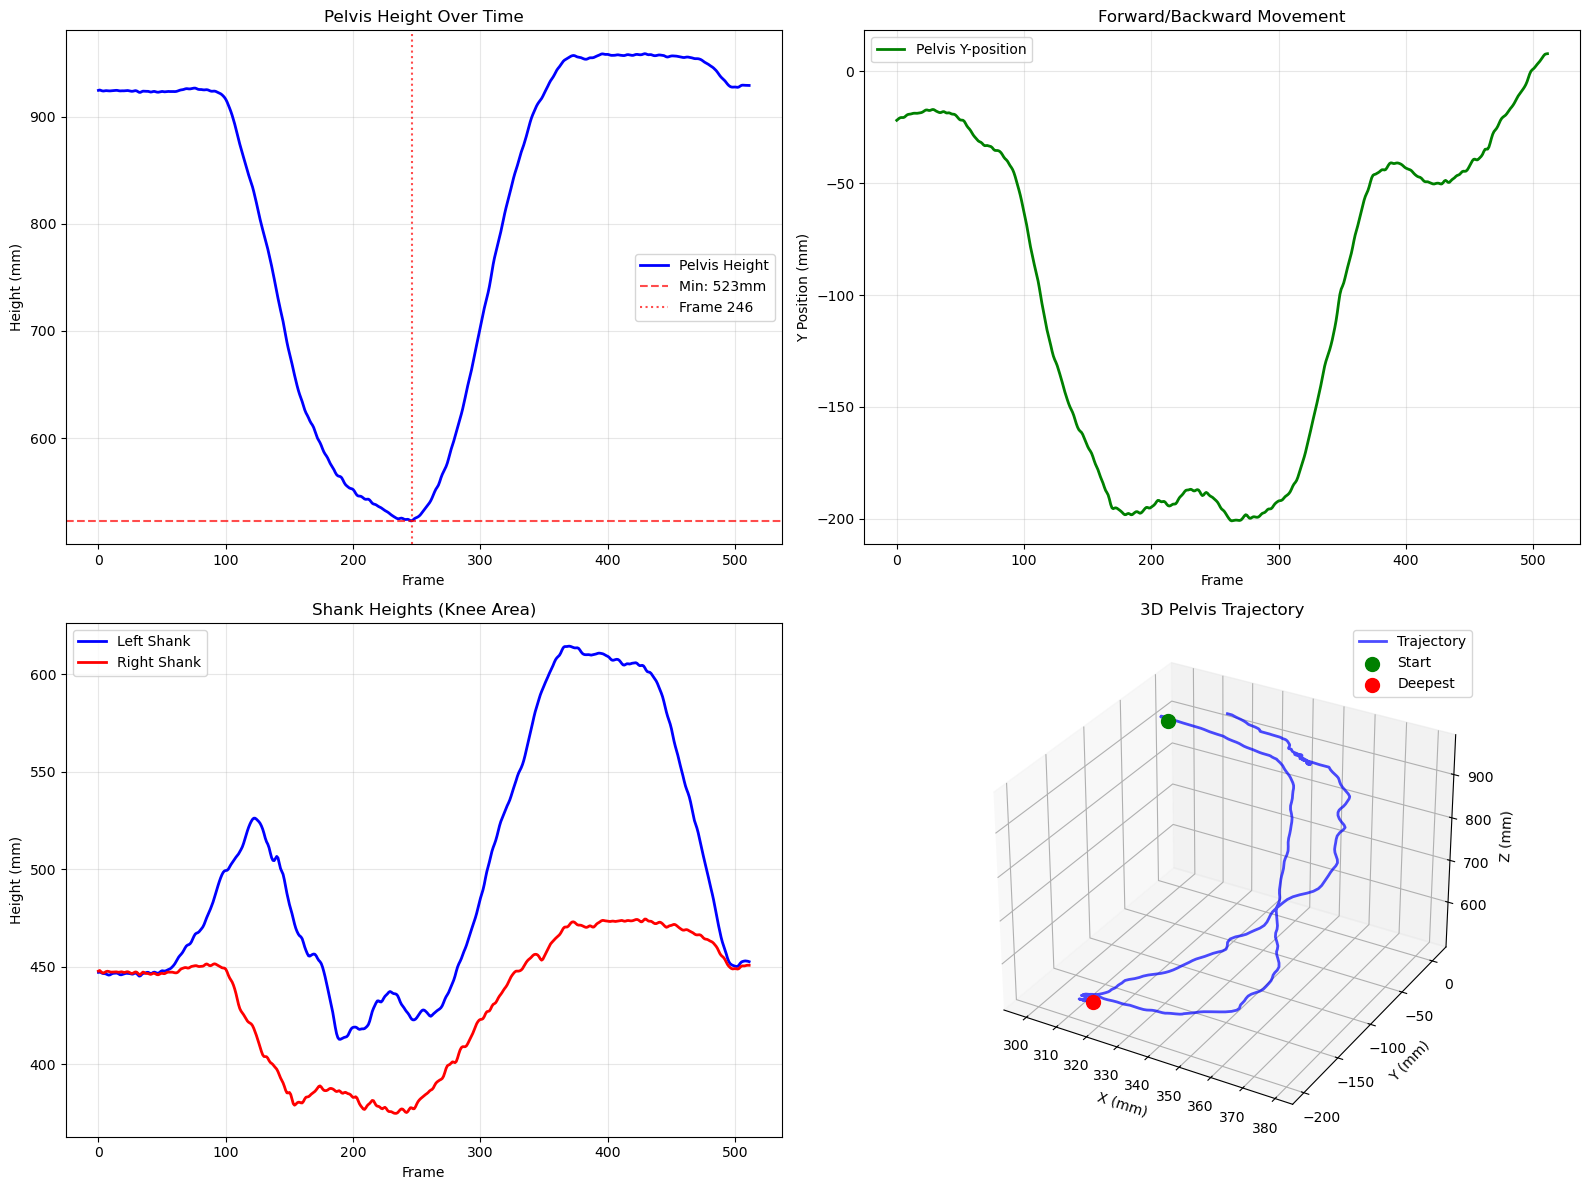


Plotting deepest squat position (frame 246)...
Plotted 19 joints and 16 connections


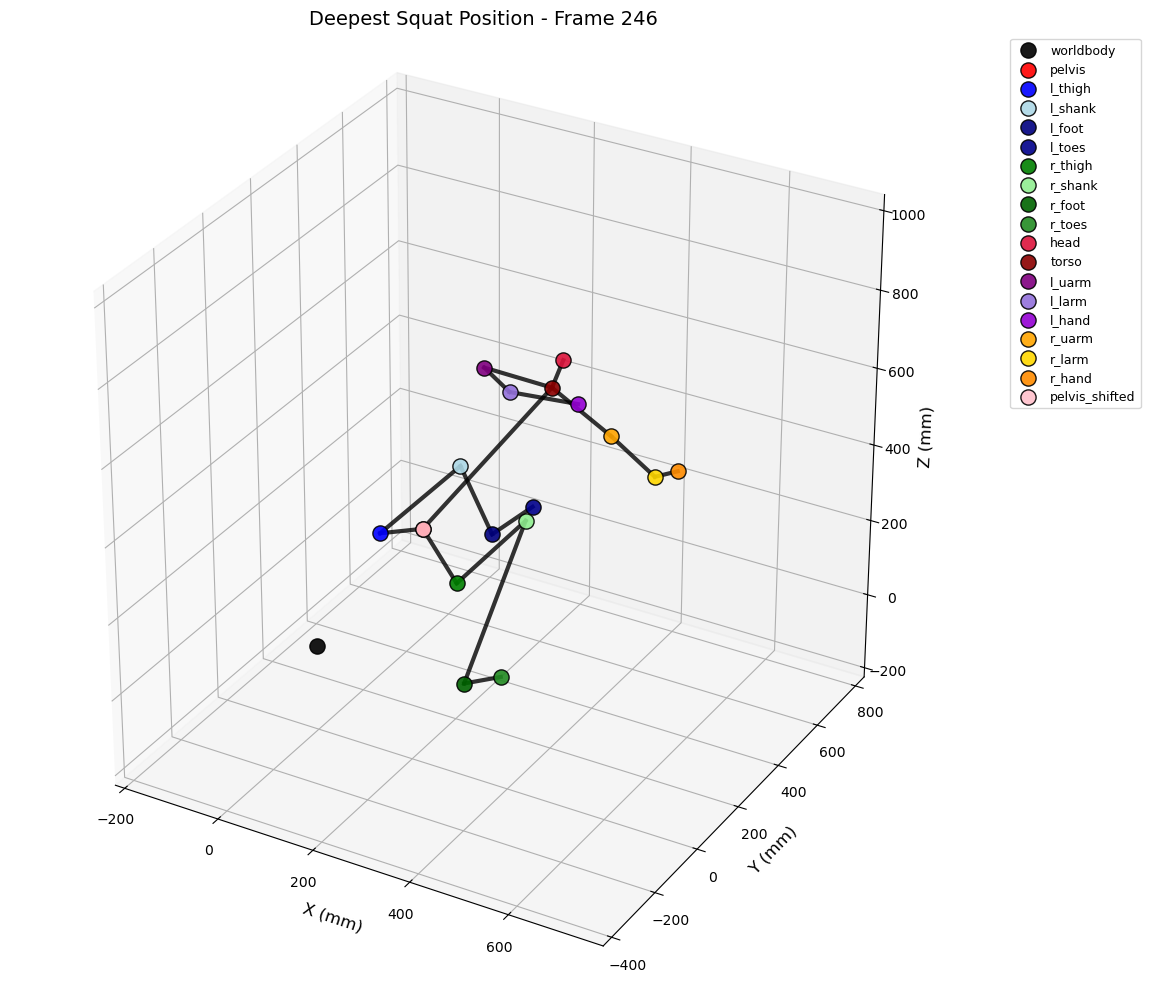


Plotting end position...
Plotted 19 joints and 16 connections


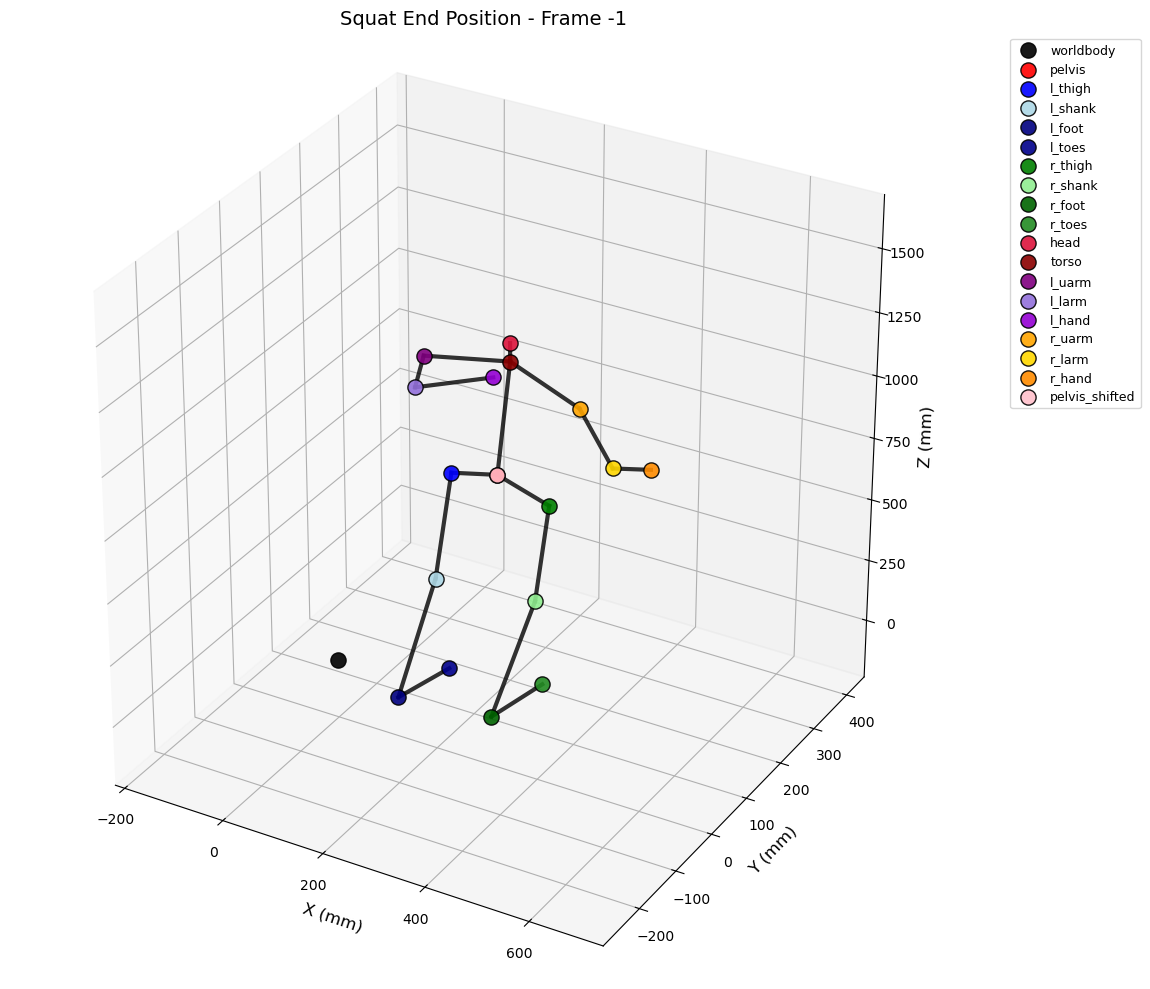

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

#Extract 4x4 transformatino matrices for each joint across data specified 
def extract_matrices_final(walk_slow, labels):
    rotation_data = walk_slow['data']['rotations']  # Shape: (4, 4, 19, 547)
    
    print(f"Rotation data shape: {rotation_data.shape}")
    print("Structure: [4x4 matrix, 19 joints, 547 frames]")
    
    matrices_dict = {} # Dictionary to hold matrices for each joint
    n_joints = rotation_data.shape[2]  # 19 joints
    n_frames = rotation_data.shape[3]  # 547 frames
    
    
    for joint_idx in range(n_joints):
        if joint_idx < len(labels):
            label = labels[joint_idx]
            joint_name = label.replace('_4X4', '')
            
            # Extract all matrices for this joint across all frames
            # Shape will be (4, 4, n_frames) -> we want (n_frames, 4, 4)
            joint_matrices = rotation_data[:, :, joint_idx, :].transpose(2, 0, 1)
            
            matrices_dict[joint_name] = joint_matrices
            
    print(f"Extracted {len(matrices_dict)} joints")
    return matrices_dict

def extract_positions_from_matrices(matrices_dict):
    positions = {}
    
    for joint_name, matrices in matrices_dict.items():
        # Extract translation component (last column, first 3 rows)
        # matrices shape: (n_frames, 4, 4)
        positions[joint_name] = matrices[:, :3, 3]  # (n_frames, 3)
    
    return positions

def plot_skeleton_frame(positions, frame_idx=0, title="Walk Movement"):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define anatomical connections
    connections = [
        ('pelvis', 'torso'),
        ('torso', 'head'),
        ('pelvis', 'l_thigh'),
        ('l_thigh', 'l_shank'),
        ('l_shank', 'l_foot'),
        ('l_foot', 'l_toes'),
        ('pelvis', 'r_thigh'),
        ('r_thigh', 'r_shank'),
        ('r_shank', 'r_foot'),
        ('r_foot', 'r_toes'),
        ('torso', 'l_uarm'),
        ('l_uarm', 'l_larm'),
        ('l_larm', 'l_hand'),
        ('torso', 'r_uarm'),
        ('r_uarm', 'r_larm'),
        ('r_larm', 'r_hand'),
    ]
    
    # Color scheme for body segments
    colors = {
        'worldbody': 'black',
        'pelvis': 'red', 'pelvis_shifted': 'pink',
        'torso': 'darkred', 'head': 'crimson',
        'l_thigh': 'blue', 'l_shank': 'lightblue', 'l_foot': 'navy', 'l_toes': 'darkblue',
        'r_thigh': 'green', 'r_shank': 'lightgreen', 'r_foot': 'darkgreen', 'r_toes': 'forestgreen',
        'l_uarm': 'purple', 'l_larm': 'mediumpurple', 'l_hand': 'darkviolet',
        'r_uarm': 'orange', 'r_larm': 'gold', 'r_hand': 'darkorange',
    }
    
    # Plot joints and collect positions for axis limits
    plotted_joints = []
    all_x, all_y, all_z = [], [], []
    
    for joint_name, pos_data in positions.items():
        if frame_idx < len(pos_data):
            pos = pos_data[frame_idx]
            color = colors.get(joint_name, 'gray')
            ax.scatter(pos[0], pos[1], pos[2], s=120, c=color, 
                      label=joint_name, alpha=0.9, edgecolors='black', linewidth=1)
            plotted_joints.append(joint_name)
            
            # Collect coordinates for axis limits
            all_x.append(pos[0])
            all_y.append(pos[1])
            all_z.append(pos[2])
    
    # Plot skeleton connections
    connection_count = 0
    for joint1, joint2 in connections:
        if joint1 in plotted_joints and joint2 in plotted_joints:
            pos1 = positions[joint1][frame_idx]
            pos2 = positions[joint2][frame_idx]
            ax.plot([pos1[0], pos2[0]], 
                   [pos1[1], pos2[1]], 
                   [pos1[2], pos2[2]], 
                   'k-', alpha=0.8, linewidth=3)
            connection_count += 1
    
    print(f"Plotted {len(plotted_joints)} joints and {connection_count} connections")
    
    # Set labels and title
    ax.set_xlabel('X (mm)', fontsize=12)
    ax.set_ylabel('Y (mm)', fontsize=12)
    ax.set_zlabel('Z (mm)', fontsize=12)
    ax.set_title(f'{title} - Frame {frame_idx}', fontsize=14)
    
    # Create legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    
    # Set equal aspect ratio
    ax.set_box_aspect([1,1,1])
    
    # Set reasonable limits based on collected coordinates - FIXED
    if all_x and all_y and all_z:  # Make sure we have data
        margin = 200  # mm
        ax.set_xlim([min(all_x) - margin, max(all_x) + margin])
        ax.set_ylim([min(all_y) - margin, max(all_y) + margin])
        ax.set_zlim([min(all_z) - margin, max(all_z) + margin])
    
    plt.tight_layout()
    plt.show()

def analyze_squat_movement(positions):

    if 'pelvis' not in positions:
        print("Pelvis data not found for analysis.")
        return None
    
    pelvis_pos = positions['pelvis']
    pelvis_height = pelvis_pos[:, 2]  # Z-coordinate (vertical)
    
    # Find key moments
    start_height = pelvis_height[0]
    min_height_frame = np.argmin(pelvis_height)
    min_height = pelvis_height[min_height_frame]
    max_height = np.max(pelvis_height)
    
    squat_depth = max_height - min_height
    
    print("\n=== SQUAT ANALYSIS ===")
    print(f"Starting height: {start_height:.2f} mm")
    print(f"Maximum height: {max_height:.2f} mm") 
    print(f"Minimum height: {min_height:.2f} mm")
    print(f"Total squat depth: {squat_depth:.2f} mm")
    print(f"Deepest point at frame: {min_height_frame}")
    print(f"Total frames: {len(pelvis_height)}")
    
    # Create analysis plots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Pelvis height over time
    ax1.plot(pelvis_height, 'b-', linewidth=2, label='Pelvis Height')
    ax1.axhline(y=min_height, color='r', linestyle='--', alpha=0.7, 
                label=f'Min: {min_height:.0f}mm')
    ax1.axvline(x=min_height_frame, color='r', linestyle=':', alpha=0.7, 
                label=f'Frame {min_height_frame}')
    ax1.set_xlabel('Frame')
    ax1.set_ylabel('Height (mm)')
    ax1.set_title('Pelvis Height Over Time')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Pelvis forward/backward movement
    ax2.plot(pelvis_pos[:, 1], 'g-', linewidth=2, label='Pelvis Y-position')
    ax2.set_xlabel('Frame')
    ax2.set_ylabel('Y Position (mm)')
    ax2.set_title('Forward/Backward Movement')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Knee analysis if available
    if 'l_shank' in positions and 'r_shank' in positions:
        l_knee_height = positions['l_shank'][:, 2] 
        r_knee_height = positions['r_shank'][:, 2]
        ax3.plot(l_knee_height, 'b-', linewidth=2, label='Left Shank')
        ax3.plot(r_knee_height, 'r-', linewidth=2, label='Right Shank')
        ax3.set_xlabel('Frame')
        ax3.set_ylabel('Height (mm)')
        ax3.set_title('Shank Heights (Knee Area)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
    
    # 3D pelvis trajectory
    ax4.remove()
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax4.plot(pelvis_pos[:, 0], pelvis_pos[:, 1], pelvis_pos[:, 2], 
             'b-', linewidth=2, alpha=0.7, label='Trajectory')
    ax4.scatter(pelvis_pos[0, 0], pelvis_pos[0, 1], pelvis_pos[0, 2], 
                c='green', s=100, label='Start')
    ax4.scatter(pelvis_pos[min_height_frame, 0], pelvis_pos[min_height_frame, 1], 
                pelvis_pos[min_height_frame, 2], c='red', s=100, label='Deepest')
    ax4.set_xlabel('X (mm)')
    ax4.set_ylabel('Y (mm)')
    ax4.set_zlabel('Z (mm)')
    ax4.set_title('3D Pelvis Trajectory')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    return min_height_frame

    

def create_simple_animation(positions, sample_every=20):
    """Create a simple animation showing key frames"""
    n_frames = len(positions['pelvis'])
    key_frames = list(range(0, n_frames, sample_every))
    
    print(f"Creating animation with frames: {key_frames}")
    
    for i, frame_idx in enumerate(key_frames):
        print(f"Showing frame {frame_idx} ({i+1}/{len(key_frames)})")
        plot_skeleton_frame(positions, frame_idx=frame_idx, 
                          title=f"Squat Movement - Frame {frame_idx}")

# Now run the corrected extraction and visualization
print("=== EXTRACTING SQUAT DATA ===")
matrices_dict = extract_matrices_final(pistol_1, labels)

print(f"\nExtracted joints and their data:")
for joint_name, matrices in matrices_dict.items():
    print(f"  {joint_name}: {matrices.shape} (frames, 4, 4)")

# Extract positions from the matrices
positions = extract_positions_from_matrices(matrices_dict)

print(f"\nPosition data summary:")
for joint_name, pos_data in positions.items():
    pos_range = f"X:[{pos_data[:,0].min():.0f},{pos_data[:,0].max():.0f}] Y:[{pos_data[:,1].min():.0f},{pos_data[:,1].max():.0f}] Z:[{pos_data[:,2].min():.0f},{pos_data[:,2].max():.0f}]"
    print(f"  {joint_name}: {pos_data.shape} - Range: {pos_range}")

# Visualize the movement
print("\n=== VISUALIZING SQUAT MOVEMENT ===")
print("Plotting initial position...")
plot_skeleton_frame(positions, frame_idx=0, title="Squat Start Position")

# Analyze the movement
deepest_frame = analyze_squat_movement(positions)

# Show deepest position
if deepest_frame:
    print(f"\nPlotting deepest squat position (frame {deepest_frame})...")
    plot_skeleton_frame(positions, frame_idx=deepest_frame, title="Deepest Squat Position")

# Show end position  
print(f"\nPlotting end position...")
plot_skeleton_frame(positions, frame_idx=-1, title="Squat End Position")



Creating animation with frames: [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
Showing frame 0 (1/11)
Plotted 19 joints and 16 connections


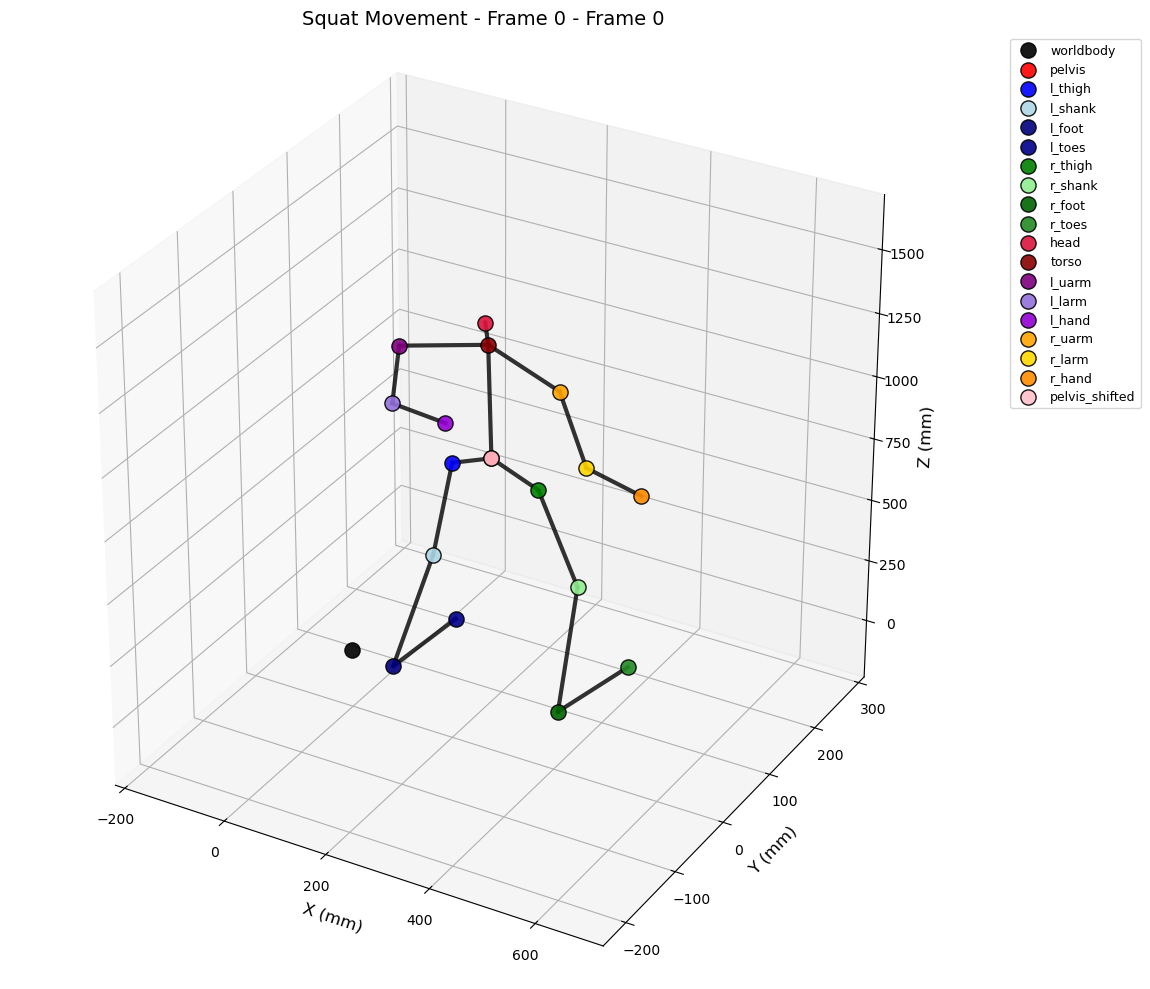

Showing frame 50 (2/11)
Plotted 19 joints and 16 connections


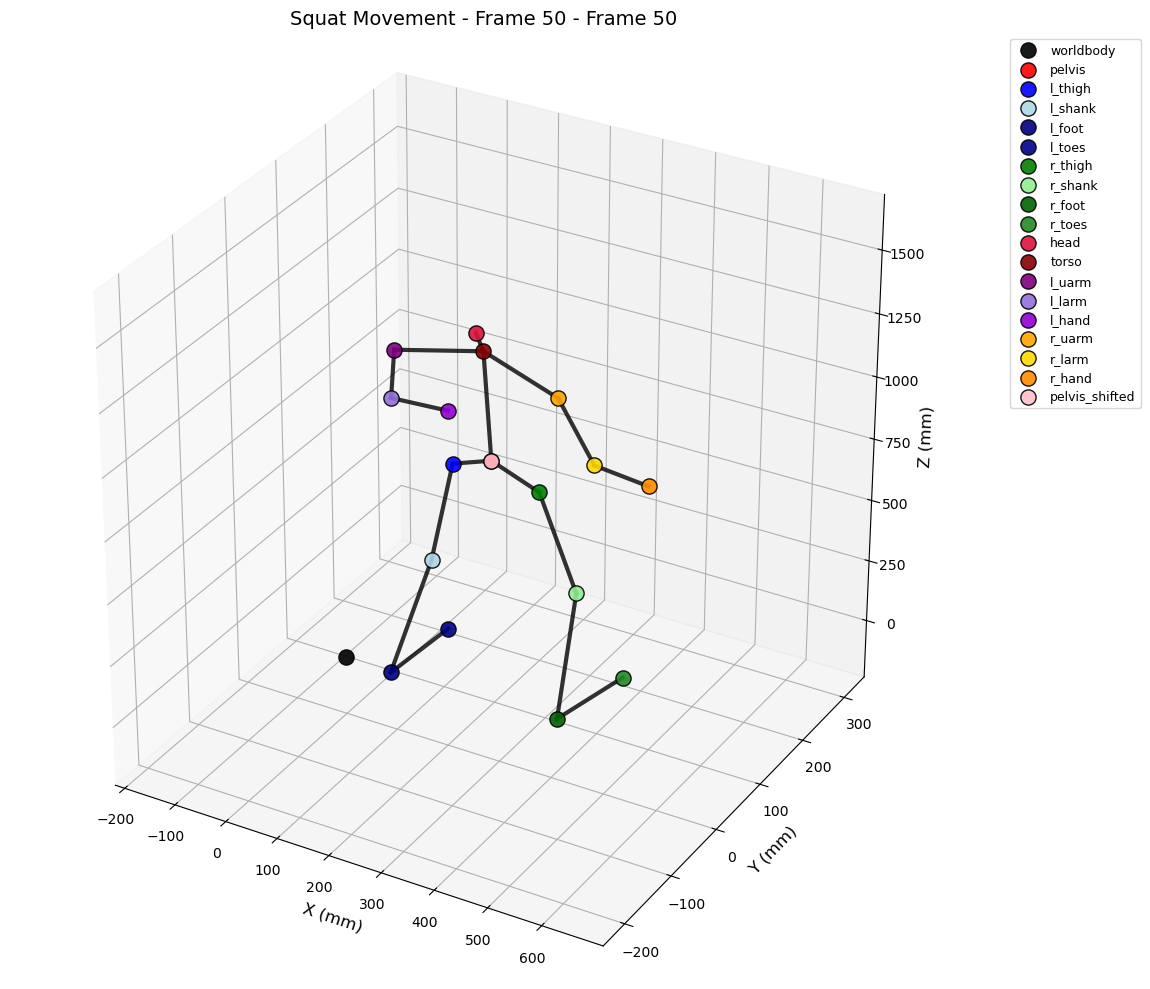

Showing frame 100 (3/11)
Plotted 19 joints and 16 connections


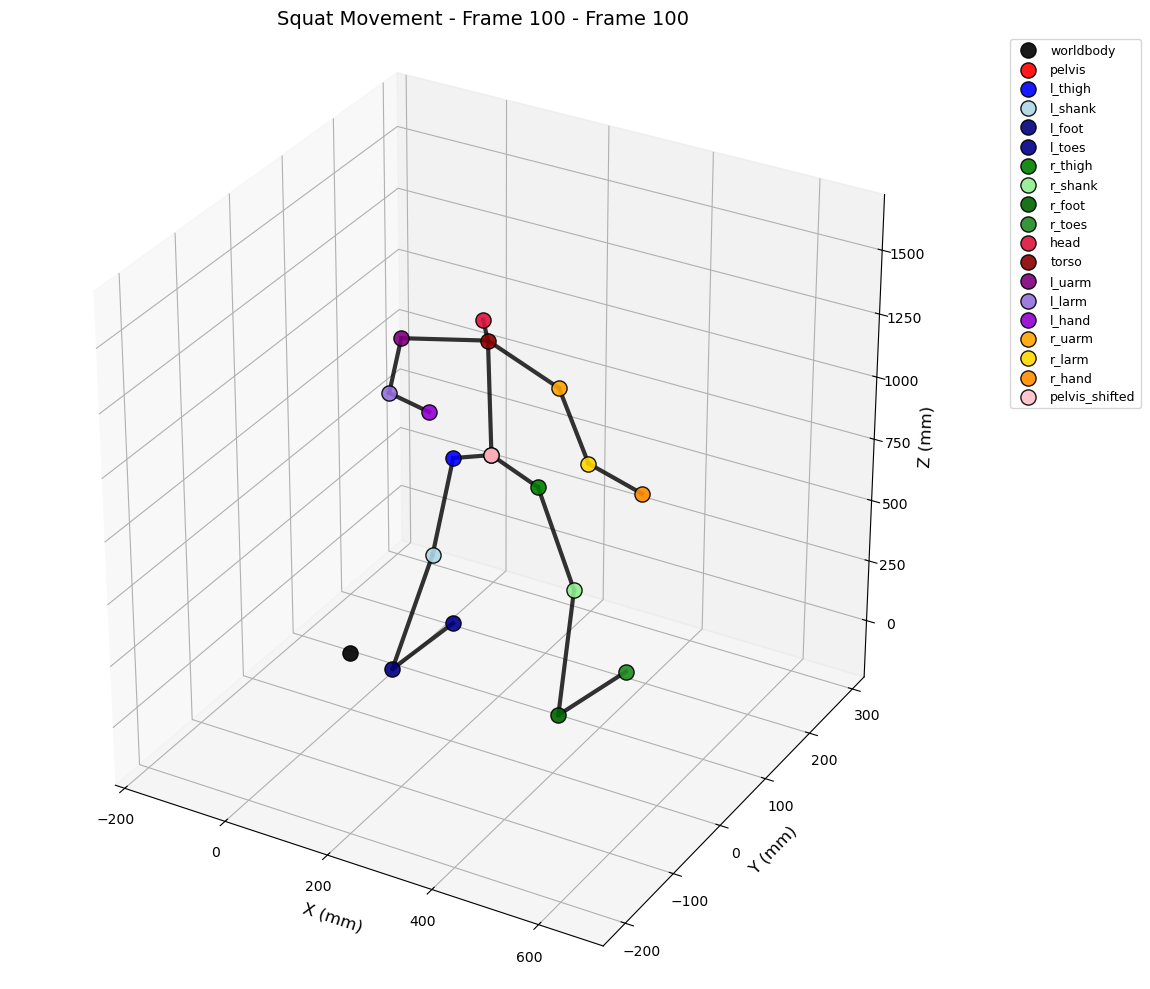

Showing frame 150 (4/11)
Plotted 19 joints and 16 connections


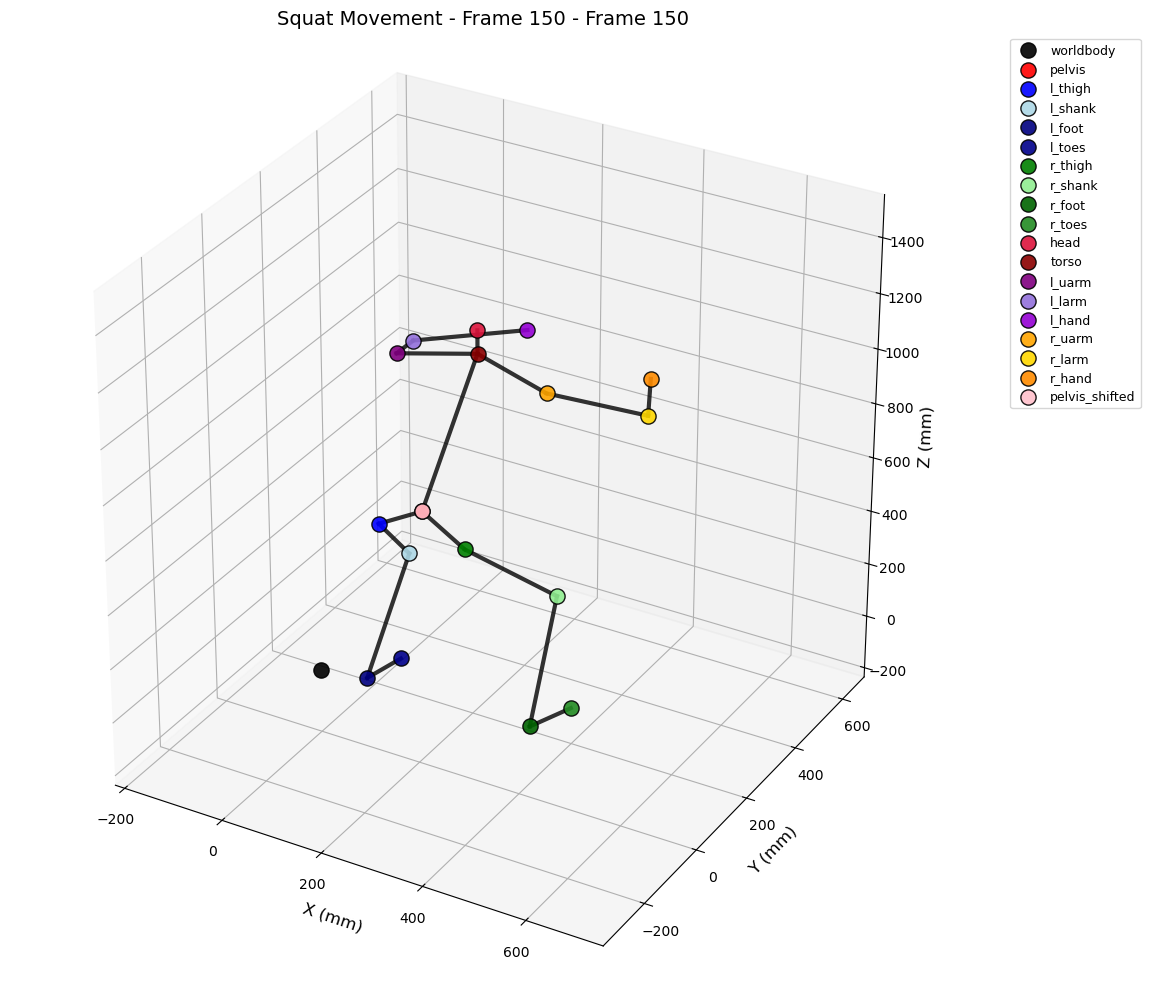

Showing frame 200 (5/11)
Plotted 19 joints and 16 connections


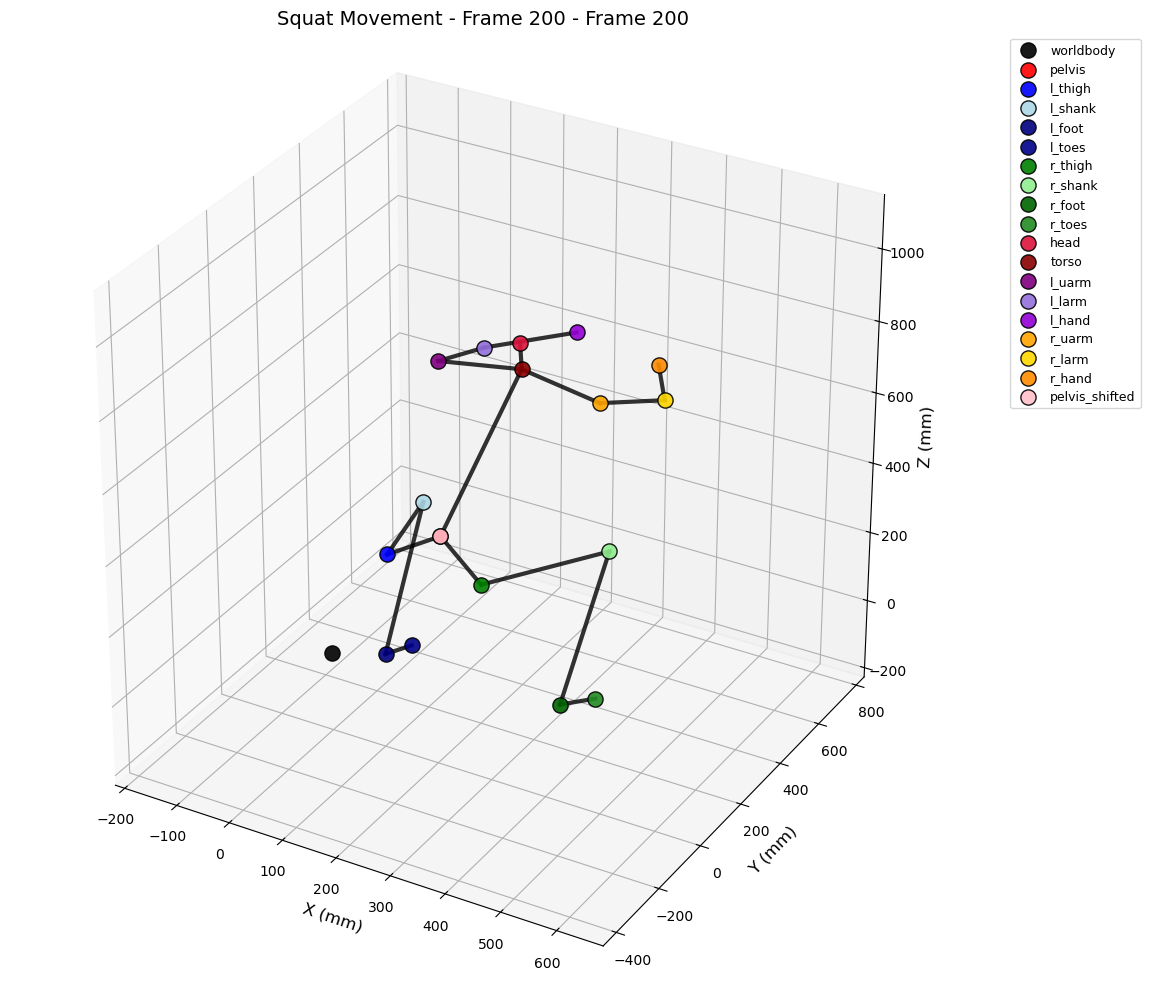

Showing frame 250 (6/11)
Plotted 19 joints and 16 connections


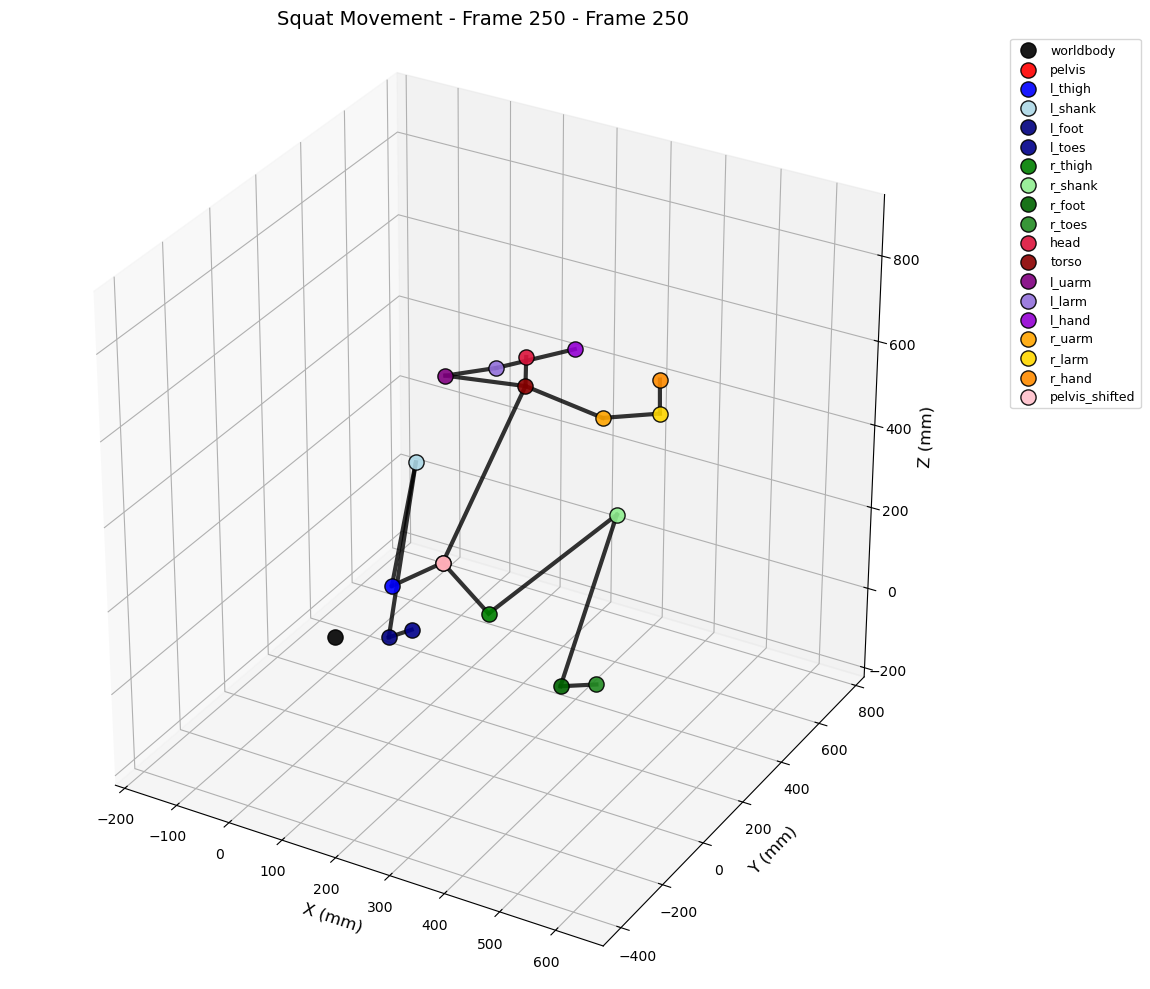

Showing frame 300 (7/11)
Plotted 19 joints and 16 connections


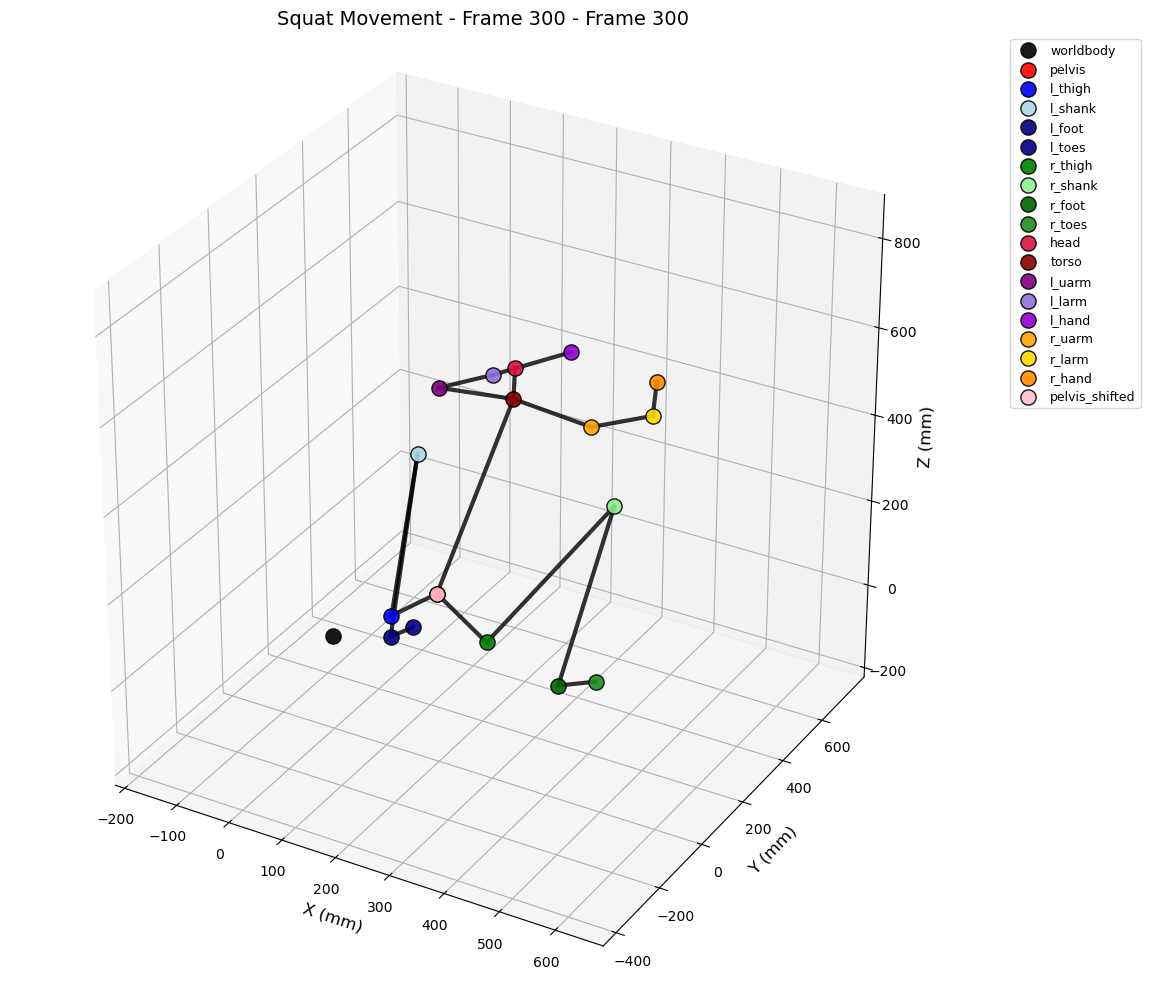

Showing frame 350 (8/11)
Plotted 19 joints and 16 connections


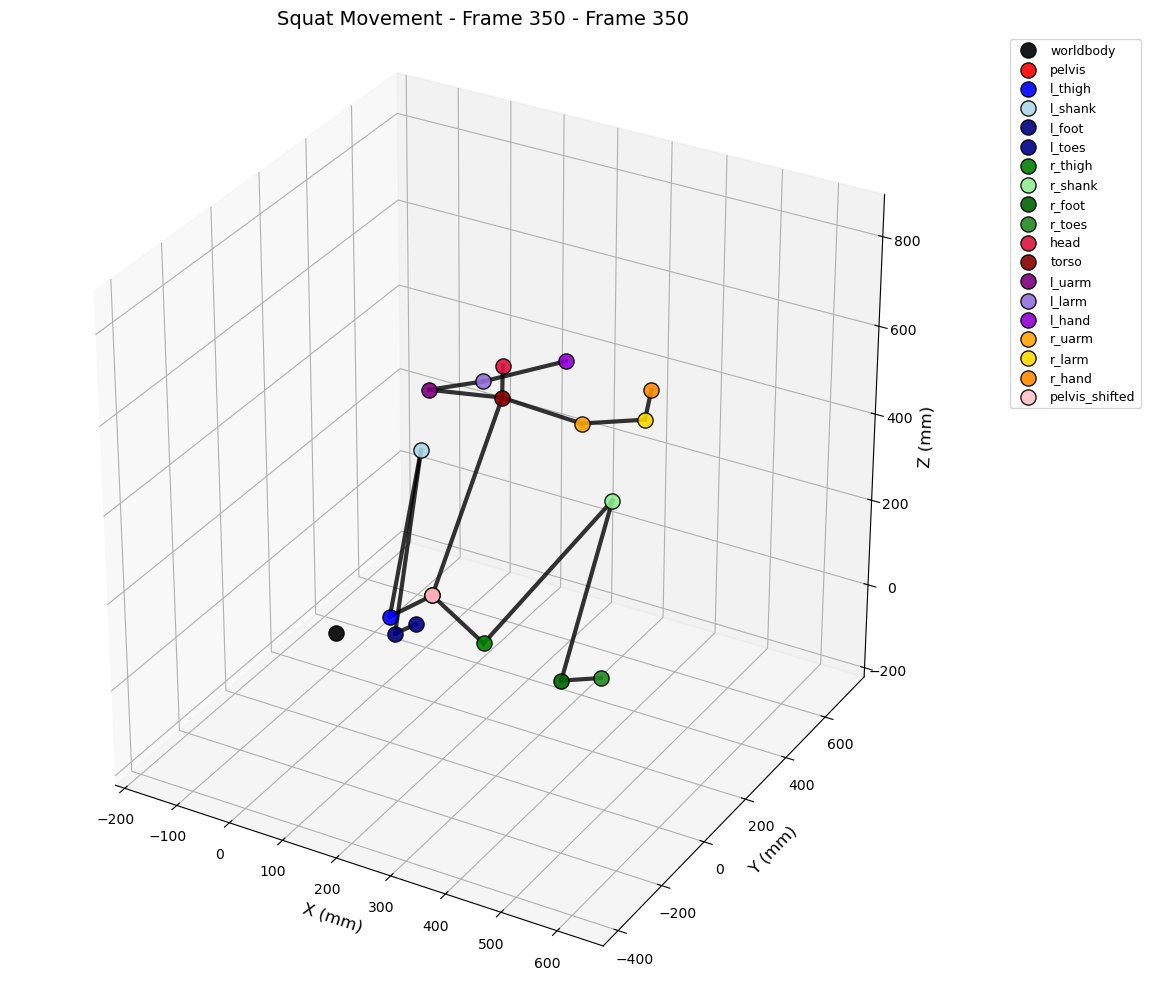

Showing frame 400 (9/11)
Plotted 19 joints and 16 connections


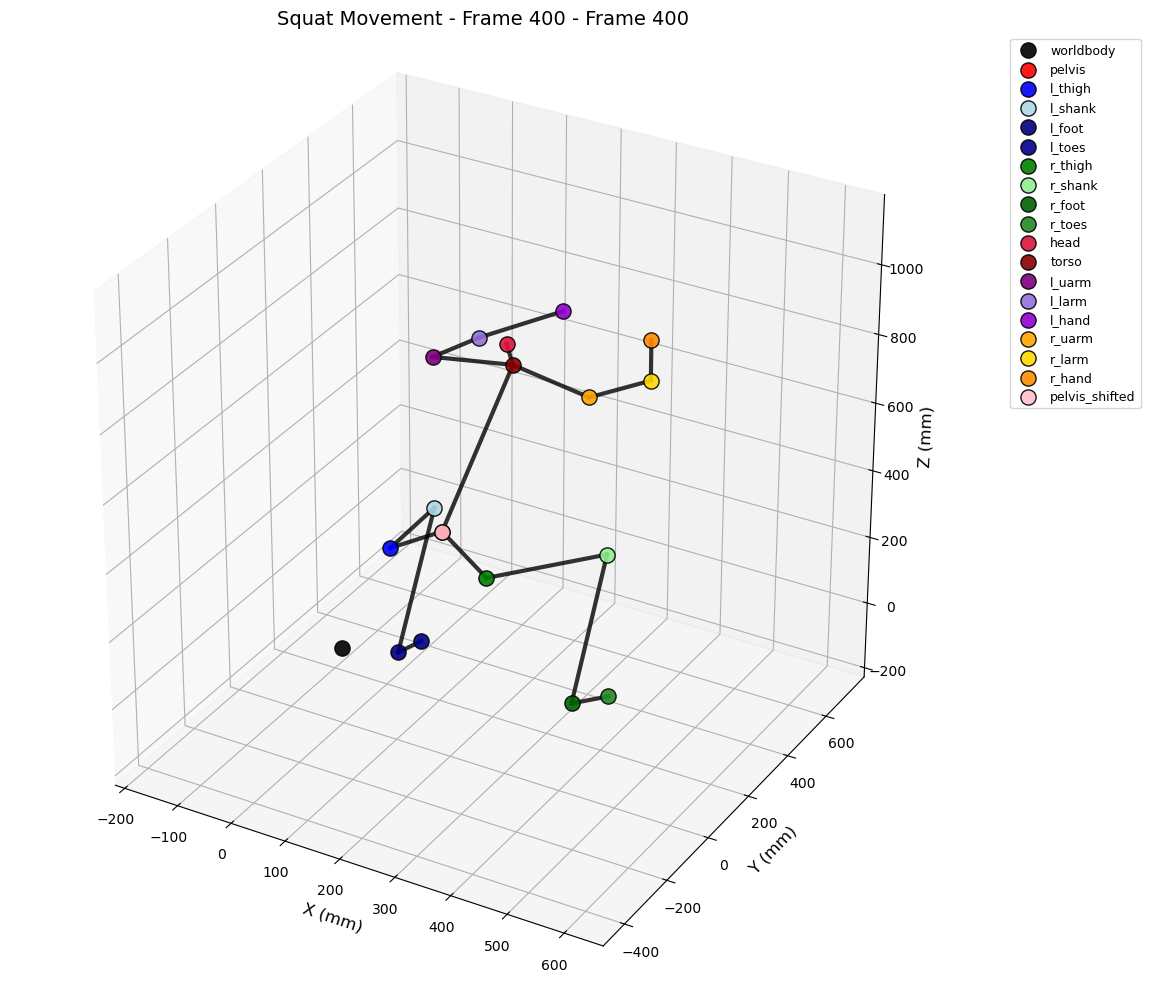

Showing frame 450 (10/11)
Plotted 19 joints and 16 connections


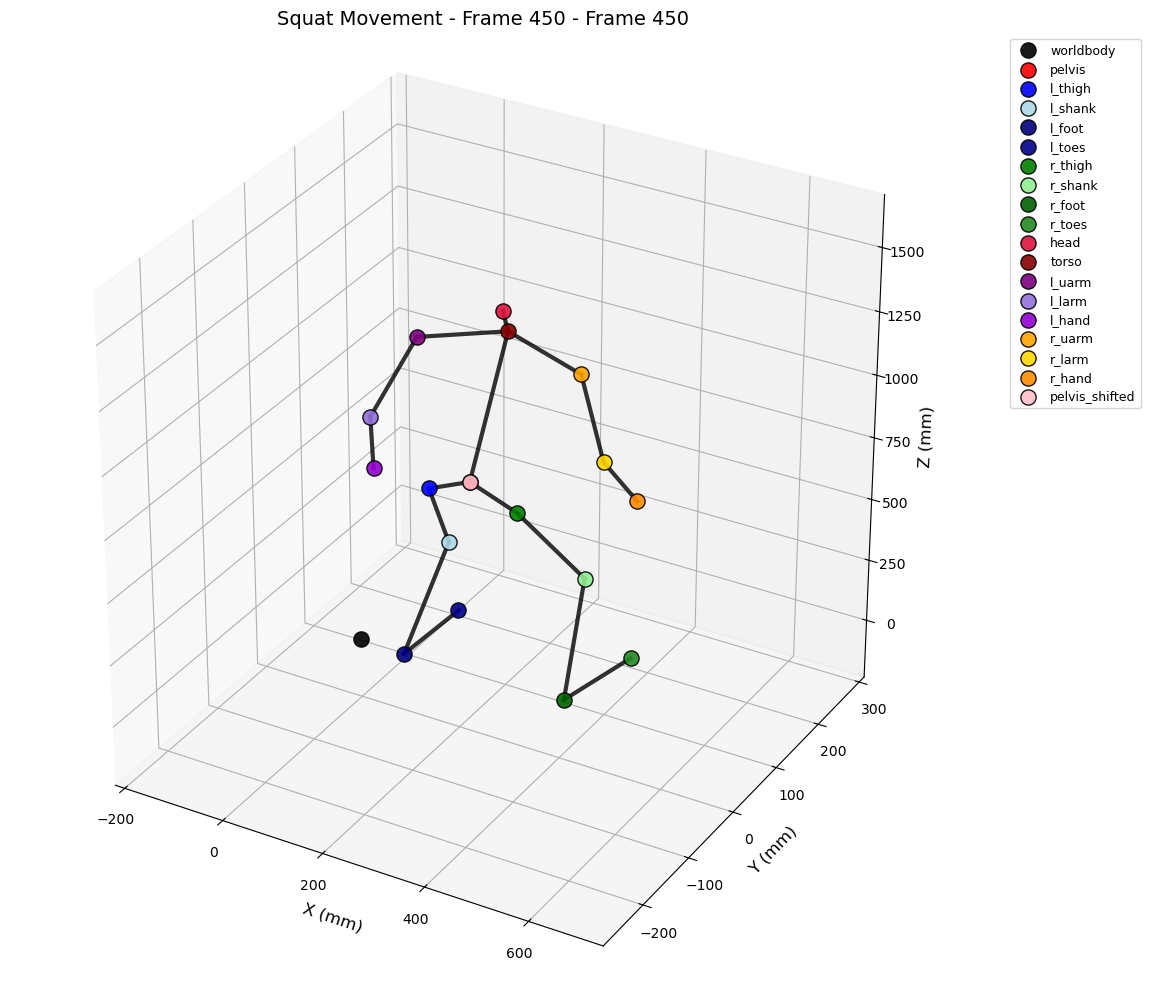

Showing frame 500 (11/11)
Plotted 19 joints and 16 connections


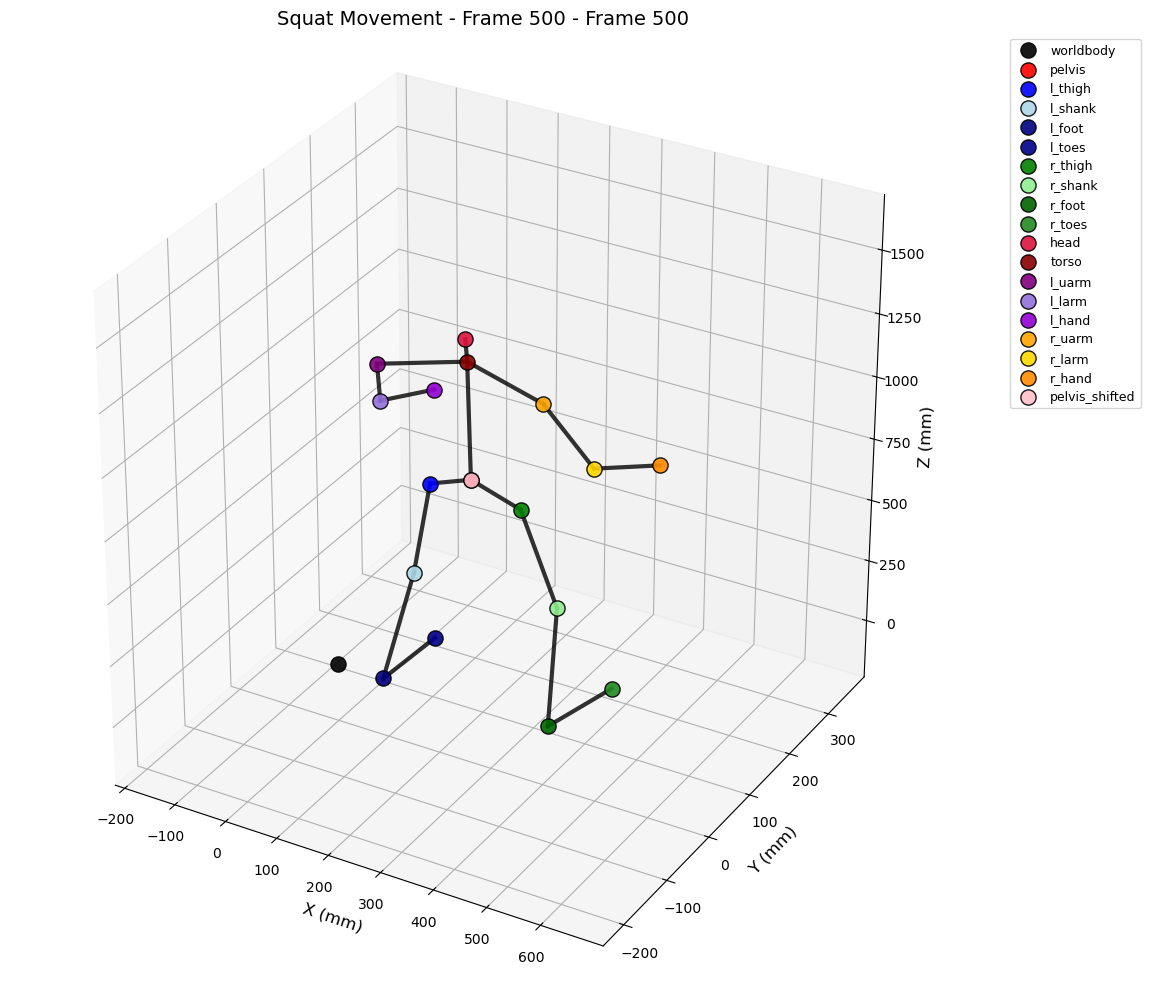

In [4]:

create_simple_animation(positions, sample_every=50)


=== CREATING INTERACTIVE ANIMATION ===
Creating interactive Plotly animation with play button and slider...
Creating animation with 52 frames (every 10th frame)



=== CREATING MATPLOTLIB CONTROLS ===
Matplotlib animation with 52 frames
Use the following commands:
- plot_frame(frame_number) to show a specific frame
- animate_sequence(start, end, step) to show a sequence

You can now use:
1. plot_frame(100) - to show frame 100
2. animate_sequence(0, 200, 20) - to show frames 0 to 200, every 20th frame
3. show_key_moments() - to show start, deepest, and end positions

Showing key moments automatically:
Showing key moments:
1. Start (frame 0)
Plotted 19 joints and 16 connections


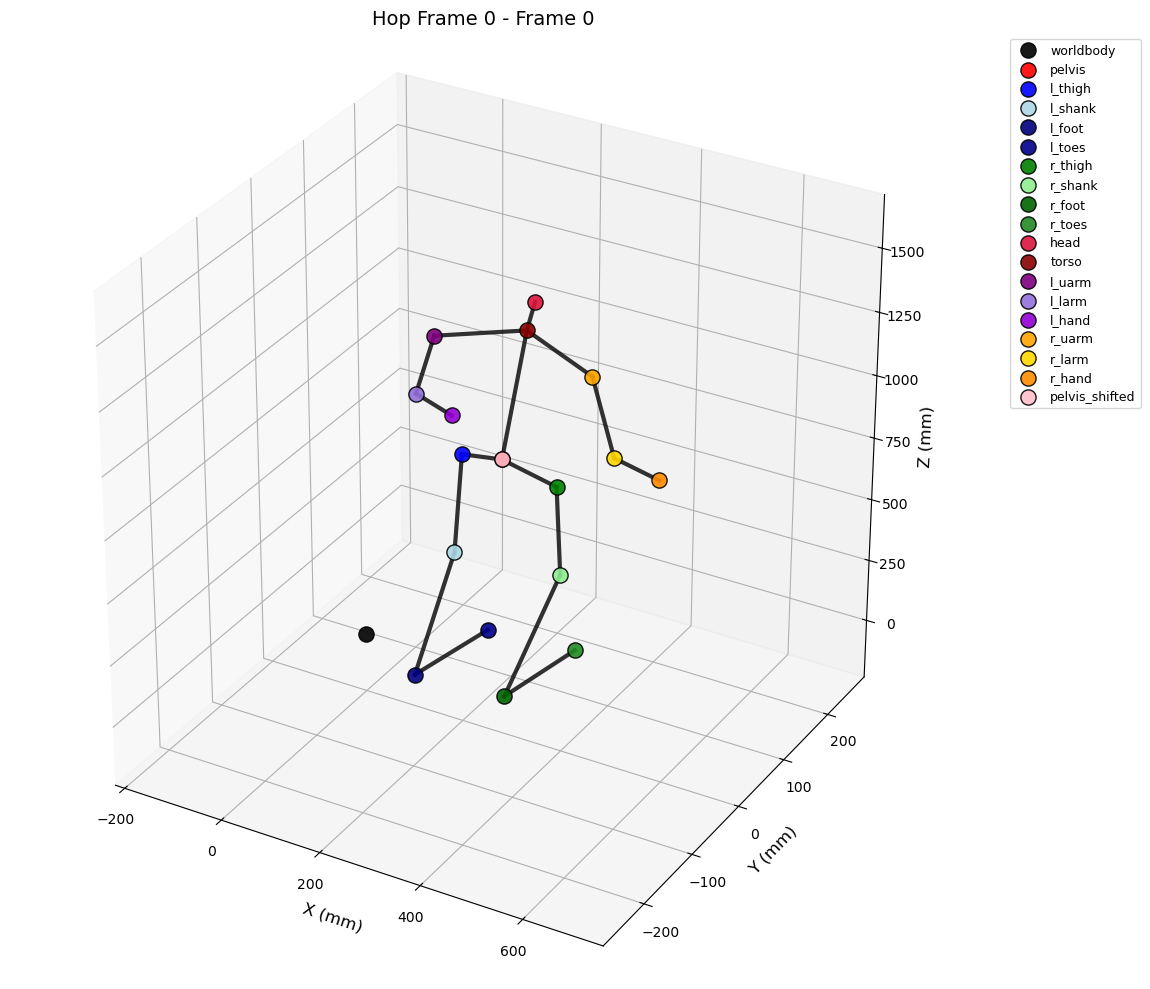

2. Deepest point (frame 246)
Plotted 19 joints and 16 connections


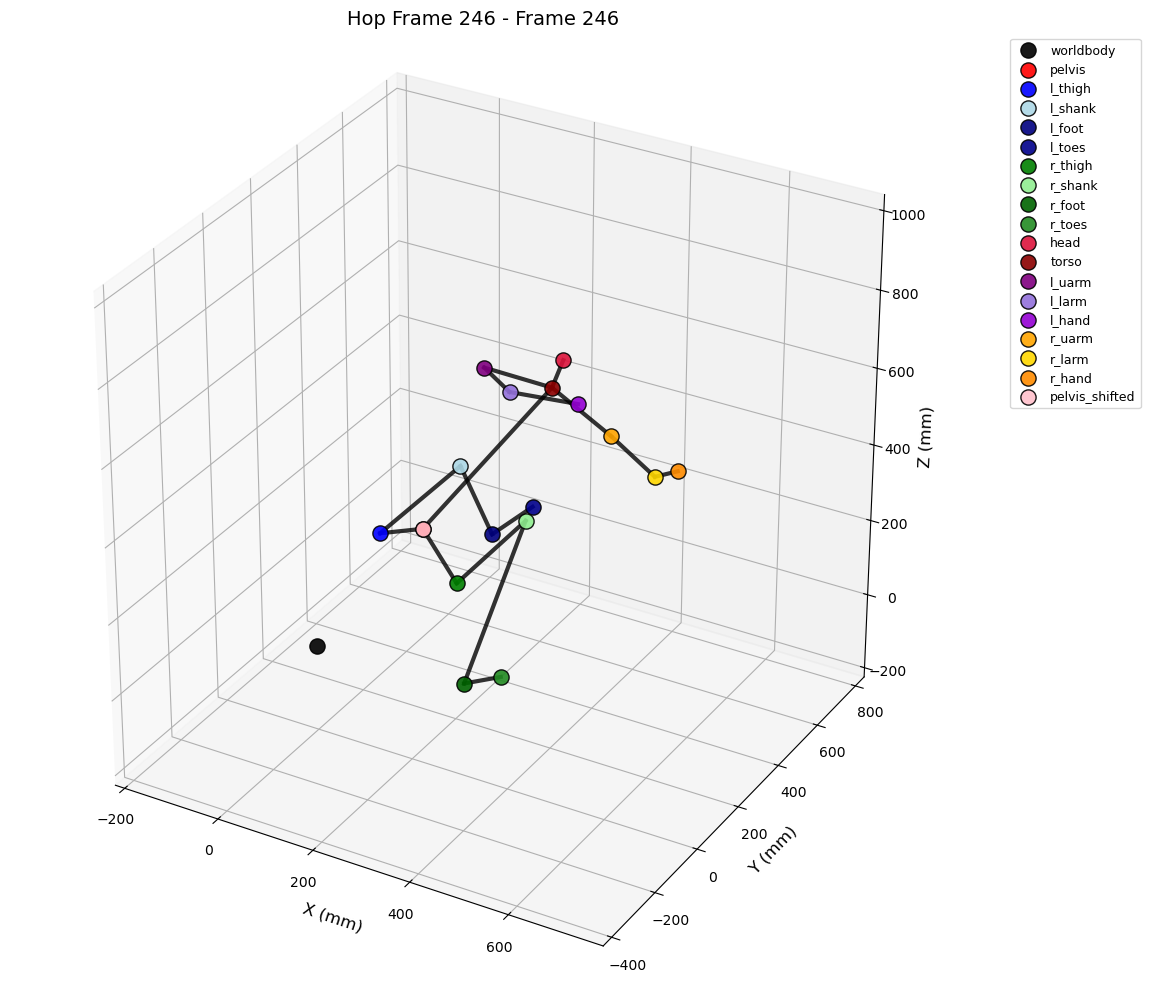

3. End (frame 511)
Plotted 19 joints and 16 connections


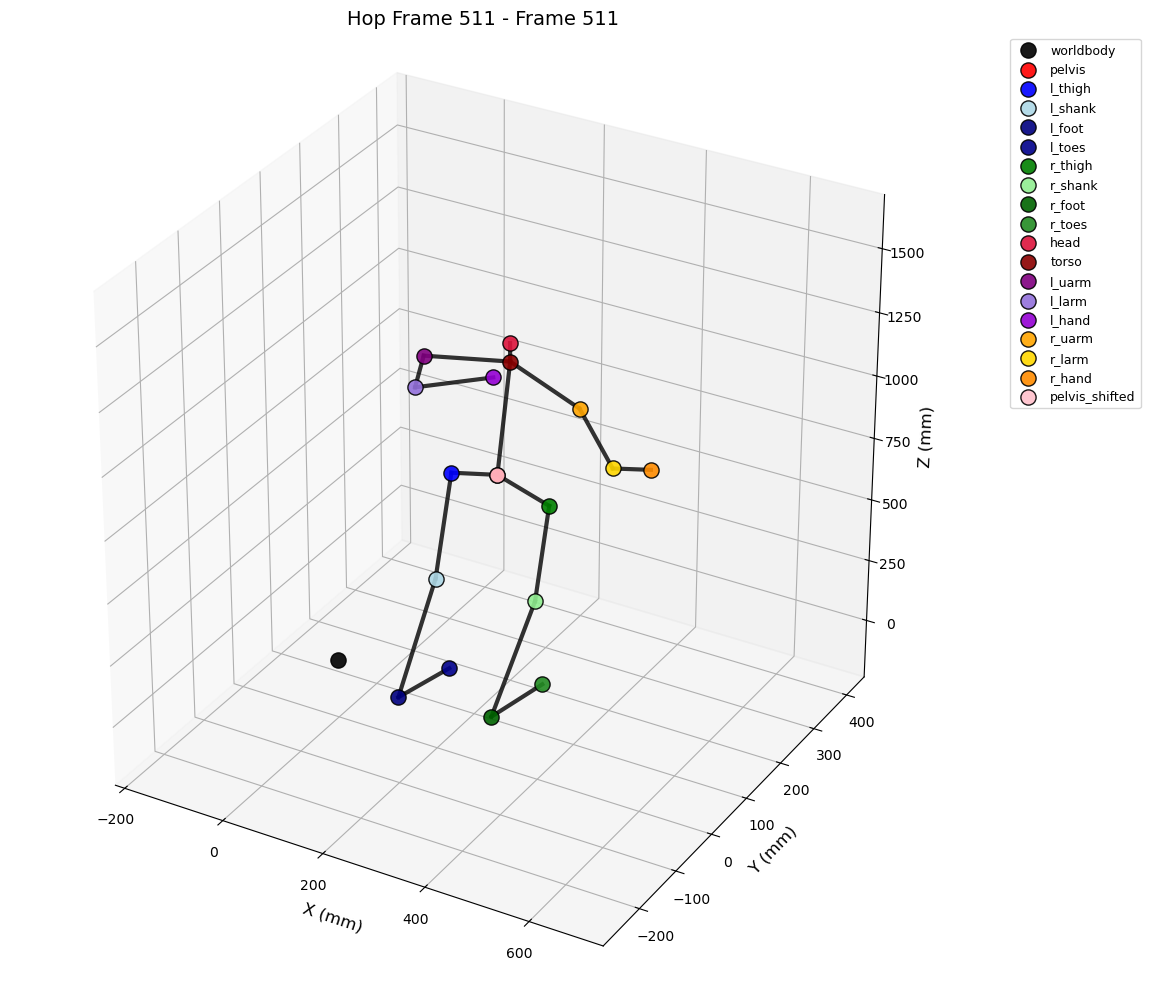

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time

def create_interactive_animation(positions, sample_rate=5):
    """Create interactive 3D animation with play button and slider"""
    
    # Get the number of frames and sample them
    n_frames = min([len(pos_data) for pos_data in positions.values()])
    frame_indices = list(range(0, n_frames, sample_rate))
    
    print(f"Creating animation with {len(frame_indices)} frames (every {sample_rate}th frame)")
    
    # Define skeleton connections
    connections = [
        ('pelvis', 'torso'), ('torso', 'head'),
        ('pelvis', 'l_thigh'), ('l_thigh', 'l_shank'), ('l_shank', 'l_foot'), ('l_foot', 'l_toes'),
        ('pelvis', 'r_thigh'), ('r_thigh', 'r_shank'), ('r_shank', 'r_foot'), ('r_foot', 'r_toes'),
        ('torso', 'l_uarm'), ('l_uarm', 'l_larm'), ('l_larm', 'l_hand'),
        ('torso', 'r_uarm'), ('r_uarm', 'r_larm'), ('r_larm', 'r_hand'),
    ]
    
    # Color scheme
    color_map = {
        'worldbody': 'black', 'pelvis': 'red', 'pelvis_shifted': 'pink',
        'torso': 'darkred', 'head': 'crimson',
        'l_thigh': 'blue', 'l_shank': 'lightblue', 'l_foot': 'navy', 'l_toes': 'darkblue',
        'r_thigh': 'green', 'r_shank': 'lightgreen', 'r_foot': 'darkgreen', 'r_toes': 'forestgreen',
        'l_uarm': 'purple', 'l_larm': 'mediumpurple', 'l_hand': 'darkviolet',
        'r_uarm': 'orange', 'r_larm': 'gold', 'r_hand': 'darkorange',
    }
    
    # Create frames for animation
    frames = []
    
    for frame_idx in frame_indices:
        frame_data = []
        
        # Add joint markers
        x_joints, y_joints, z_joints, names, colors = [], [], [], [], []
        available_joints = []
        
        for joint_name, pos_data in positions.items():
            if frame_idx < len(pos_data):
                pos = pos_data[frame_idx]
                x_joints.append(pos[0])
                y_joints.append(pos[1])
                z_joints.append(pos[2])
                names.append(joint_name)
                colors.append(color_map.get(joint_name, 'gray'))
                available_joints.append(joint_name)
        
        # Add joint scatter plot
        frame_data.append(go.Scatter3d(
            x=x_joints, y=y_joints, z=z_joints,
            mode='markers',
            marker=dict(size=10, color=colors, line=dict(width=2, color='black')),
            text=names,
            hovertemplate='<b>%{text}</b><br>X: %{x:.1f}<br>Y: %{y:.1f}<br>Z: %{z:.1f}<extra></extra>',
            name='Joints',
            showlegend=False
        ))
        
        # Add skeleton connections
        for joint1, joint2 in connections:
            if joint1 in available_joints and joint2 in available_joints:
                pos1 = positions[joint1][frame_idx]
                pos2 = positions[joint2][frame_idx]
                
                frame_data.append(go.Scatter3d(
                    x=[pos1[0], pos2[0]], 
                    y=[pos1[1], pos2[1]], 
                    z=[pos1[2], pos2[2]],
                    mode='lines',
                    line=dict(color='black', width=6),
                    showlegend=False,
                    hoverinfo='skip'
                ))
        
        frames.append(go.Frame(data=frame_data, name=str(frame_idx)))
    
    # Create the initial figure
    fig = go.Figure(data=frames[0].data if frames else [], frames=frames)
    
    # Calculate axis ranges for consistent view
    all_x, all_y, all_z = [], [], []
    for joint_name, pos_data in positions.items():
        all_x.extend(pos_data[:, 0])
        all_y.extend(pos_data[:, 1])
        all_z.extend(pos_data[:, 2])
    
    margin = 200
    x_range = [min(all_x) - margin, max(all_x) + margin]
    y_range = [min(all_y) - margin, max(all_y) + margin]
    z_range = [min(all_z) - margin, max(all_z) + margin]
    
    # Update layout with animation controls
    fig.update_layout(
        title={
            'text': 'Interactive Squat Movement Analysis',
            'x': 0.5,
            'font': {'size': 20}
        },
        scene=dict(
            xaxis=dict(title='X (mm)', range=x_range),
            yaxis=dict(title='Y (mm)', range=y_range),
            zaxis=dict(title='Z (mm)', range=z_range),
            aspectmode='cube',
            camera=dict(
                up=dict(x=0, y=0, z=1),
                center=dict(x=0, y=0, z=0),
                eye=dict(x=1.5, y=1.5, z=1.2)
            )
        ),
        width=1000,
        height=700,
        
        # Add play/pause buttons
        updatemenus=[{
            "buttons": [
                {
                    "args": [None, {
                        "frame": {"duration": 100, "redraw": True},
                        "fromcurrent": True,
                        "transition": {"duration": 50, "easing": "quadratic-in-out"}
                    }],
                    "label": "▶ Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {
                        "frame": {"duration": 0, "redraw": True},
                        "mode": "immediate",
                        "transition": {"duration": 0}
                    }],
                    "label": "⏸ Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 70},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }],
        
        # Add slider for frame control
        sliders=[{
            "active": 0,
            "yanchor": "top",
            "xanchor": "left",
            "currentvalue": {
                "font": {"size": 16},
                "prefix": "Frame: ",
                "visible": True,
                "xanchor": "right"
            },
            "transition": {"duration": 200, "easing": "cubic-in-out"},
            "pad": {"b": 10, "t": 50},
            "len": 0.9,
            "x": 0.1,
            "y": 0,
            "steps": [
                {
                    "args": [[frame_name], {
                        "frame": {"duration": 200, "redraw": True},
                        "mode": "immediate",
                        "transition": {"duration": 200}
                    }],
                    "label": str(frame_name),
                    "method": "animate"
                } for frame_name in [f.name for f in frames]
            ]
        }]
    )
    
    return fig

def create_matplotlib_animation_with_controls(positions, sample_rate=10):
    """Create a matplotlib version with manual controls"""
    
    n_frames = min([len(pos_data) for pos_data in positions.values()])
    frame_indices = list(range(0, n_frames, sample_rate))
    
    print(f"Matplotlib animation with {len(frame_indices)} frames")
    print("Use the following commands:")
    print("- plot_frame(frame_number) to show a specific frame")
    print("- animate_sequence(start, end, step) to show a sequence")
    
    def plot_frame(frame_idx):
        """Plot a specific frame"""
        if frame_idx >= n_frames:
            frame_idx = n_frames - 1
        plot_skeleton_frame(positions, frame_idx=frame_idx, 
                          title=f"Hop Frame {frame_idx}")
    
    def animate_sequence(start_frame=0, end_frame=None, step=20):
        """Show a sequence of frames"""
        if end_frame is None:
            end_frame = n_frames
        
        frames_to_show = list(range(start_frame, min(end_frame, n_frames), step))
        print(f"Showing frames: {frames_to_show}")
        
        for i, frame_idx in enumerate(frames_to_show):
            print(f"Frame {frame_idx} ({i+1}/{len(frames_to_show)})")
            plot_frame(frame_idx)
    
    def show_key_moments():
        """Show key moments in the hop"""
        if 'pelvis' in positions:
            pelvis_height = positions['pelvis'][:, 2]
            
            start_frame = 0
            min_frame = np.argmin(pelvis_height)
            end_frame = len(pelvis_height) - 1
            
            print("Showing key moments:")
            print(f"1. Start (frame {start_frame})")
            plot_frame(start_frame)
            
            print(f"2. Deepest point (frame {min_frame})")  
            plot_frame(min_frame)
            
            print(f"3. End (frame {end_frame})")
            plot_frame(end_frame)
    
    # Return the control functions
    return plot_frame, animate_sequence, show_key_moments

# Add these functions to your existing code:

# Create the interactive Plotly animation
print("\n=== CREATING INTERACTIVE ANIMATION ===")
print("Creating interactive Plotly animation with play button and slider...")

# This will create the interactive animation
interactive_fig = create_interactive_animation(positions, sample_rate=10)

# Show the interactive plot
interactive_fig.show()

# Also create matplotlib controls for more detailed analysis
print("\n=== CREATING MATPLOTLIB CONTROLS ===")
plot_frame, animate_sequence, show_key_moments = create_matplotlib_animation_with_controls(positions)

print("\nYou can now use:")
print("1. plot_frame(100) - to show frame 100")
print("2. animate_sequence(0, 200, 20) - to show frames 0 to 200, every 20th frame")
print("3. show_key_moments() - to show start, deepest, and end positions")

# Example usage:
print("\nShowing key moments automatically:")
show_key_moments()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def extract_matrices_final(triple_hop_2, labels):
    """Extract 4x4 matrices"""
    rotation_data = triple_hop_2['data']['rotations']
    matrices_dict = {}
    n_joints = rotation_data.shape[2]
    n_frames = rotation_data.shape[3]
    
    for joint_idx in range(n_joints):
        if joint_idx < len(labels):
            label = labels[joint_idx]
            joint_name = label.replace('_4X4', '')
            joint_matrices = rotation_data[:, :, joint_idx, :].transpose(2, 0, 1)
            matrices_dict[joint_name] = joint_matrices
    return matrices_dict

def extract_positions_from_matrices(matrices_dict):
    """Extract 3D positions"""
    positions = {}
    for joint_name, matrices in matrices_dict.items():
        positions[joint_name] = matrices[:, :3, 3]
    return positions

def analyze_right_foot_jumps_corrected_coordinates(positions):
    """Complete analysis using correct coordinate system"""
    
    if 'r_foot' not in positions:
        print("ERROR: Right foot data not found!")
        print(f"Available joints: {list(positions.keys())}")
        return None
    
    # Get right foot trajectory with CORRECT coordinate system
    right_foot_trajectory = positions['r_foot']
    right_foot_mediolateral = right_foot_trajectory[:, 0]  # X = side-to-side
    right_foot_anteroposterior = right_foot_trajectory[:, 1]  # Y = forward-backward  
    right_foot_height = right_foot_trajectory[:, 2]  # Z = up-down (height)
    
    print(f"=== RIGHT FOOT ANALYSIS (CORRECTED COORDINATES) ===")
    print(f"Coordinate System: X=Mediolateral, Y=Anterior-Posterior, Z=Proximal-Distal")
    print(f"Frames: {len(right_foot_height)}")
    print(f"Height (Z) range: {right_foot_height.min():.1f} to {right_foot_height.max():.1f} mm")
    print(f"Forward (Y) range: {right_foot_anteroposterior.min():.1f} to {right_foot_anteroposterior.max():.1f} mm")
    print(f"Lateral (X) range: {right_foot_mediolateral.min():.1f} to {right_foot_mediolateral.max():.1f} mm")
    
    # Find peaks (flight phases) and valleys (ground contacts)
    peaks, _ = find_peaks(right_foot_height, prominence=40, distance=20)
    valleys, _ = find_peaks(-right_foot_height, prominence=30, distance=15)
    
    print(f"\nDetected {len(peaks)} flight peaks at frames: {peaks}")
    print(f"Detected {len(valleys)} ground contacts at frames: {valleys}")
    
    # Calculate comprehensive jump metrics
    jump_data = []
    
    for i, peak_frame in enumerate(peaks):
        # Find takeoff valley before this peak
        takeoff_valleys = valleys[valleys < peak_frame]
        takeoff_frame = takeoff_valleys[-1] if len(takeoff_valleys) > 0 else 0
        
        # Find landing valley after this peak
        landing_valleys = valleys[valleys > peak_frame]
        landing_frame = landing_valleys[0] if len(landing_valleys) > 0 else len(right_foot_height) - 1
        
        # HEIGHT ANALYSIS (Z-axis)
        takeoff_height = right_foot_height[takeoff_frame]
        peak_height = right_foot_height[peak_frame]
        landing_height = right_foot_height[landing_frame]
        jump_height = peak_height - takeoff_height
        
        # FORWARD DISTANCE ANALYSIS (Y-axis) - This is the actual jump length
        takeoff_y_position = right_foot_anteroposterior[takeoff_frame]
        landing_y_position = right_foot_anteroposterior[landing_frame]
        jump_length = landing_y_position - takeoff_y_position  # Forward distance
        
        # LATERAL DEVIATION ANALYSIS (X-axis) - Important for stability
        takeoff_x_position = right_foot_mediolateral[takeoff_frame]
        landing_x_position = right_foot_mediolateral[landing_frame]
        lateral_deviation = landing_x_position - takeoff_x_position  # Side-to-side drift
        
        # FLIGHT TIME
        flight_frames = landing_frame - takeoff_frame
        
        jump_info = {
            'hop_number': i + 1,
            'takeoff_frame': takeoff_frame,
            'peak_frame': peak_frame,
            'landing_frame': landing_frame,
            
            # Height metrics (Z-axis)
            'takeoff_height': takeoff_height,
            'peak_height': peak_height,
            'landing_height': landing_height,
            'jump_height': jump_height,
            
            # Forward distance metrics (Y-axis)
            'takeoff_y_position': takeoff_y_position,
            'landing_y_position': landing_y_position,
            'jump_length': jump_length,
            
            # Lateral stability metrics (X-axis)
            'takeoff_x_position': takeoff_x_position,
            'landing_x_position': landing_x_position,
            'lateral_deviation': lateral_deviation,
            
            # Temporal metrics
            'flight_frames': flight_frames
        }
        
        jump_data.append(jump_info)
        
        print(f"\nHop {i+1}:")
        print(f"  Takeoff: Frame {takeoff_frame}")
        print(f"    Height (Z): {takeoff_height:.1f}mm")
        print(f"    Forward (Y): {takeoff_y_position:.1f}mm") 
        print(f"    Lateral (X): {takeoff_x_position:.1f}mm")
        print(f"  Peak: Frame {peak_frame}, Height: {peak_height:.1f}mm")
        print(f"  Landing: Frame {landing_frame}")
        print(f"    Height (Z): {landing_height:.1f}mm")
        print(f"    Forward (Y): {landing_y_position:.1f}mm")
        print(f"    Lateral (X): {landing_x_position:.1f}mm")
        print(f"  PERFORMANCE METRICS:")
        print(f"    Jump Height: {jump_height:.1f}mm")
        print(f"    Jump Length: {jump_length:.1f}mm") 
        print(f"    Lateral Deviation: {lateral_deviation:.1f}mm")
        print(f"    Flight Time: {flight_frames} frames")
    
    # Enhanced summary statistics
    if jump_data:
        jump_heights = [hop['jump_height'] for hop in jump_data]
        jump_lengths = [hop['jump_length'] for hop in jump_data]
        lateral_deviations = [abs(hop['lateral_deviation']) for hop in jump_data]
        
        print(f"\n=== COMPREHENSIVE SUMMARY ===")
        print(f"Total hops: {len(jump_heights)}")
        
        print(f"\nVERTICAL PERFORMANCE (Z-axis):")
        print(f"  Jump heights: {[f'{h:.0f}mm' for h in jump_heights]}")
        print(f"  Average: {np.mean(jump_heights):.1f}mm")
        print(f"  Consistency (CV): {(np.std(jump_heights)/np.mean(jump_heights)*100):.1f}%")
        
        print(f"\nHORIZONTAL PERFORMANCE (Y-axis):")
        print(f"  Jump lengths: {[f'{l:.0f}mm' for l in jump_lengths]}")
        print(f"  Average: {np.mean(jump_lengths):.1f}mm")
        print(f"  Total distance: {sum(jump_lengths):.0f}mm")
        print(f"  Consistency (CV): {(np.std(jump_lengths)/np.mean(jump_lengths)*100):.1f}%")
        
        print(f"\nLATERAL STABILITY (X-axis):")
        print(f"  Lateral deviations: {[f'{d:.0f}mm' for d in lateral_deviations]}")
        print(f"  Average deviation: {np.mean(lateral_deviations):.1f}mm")
        print(f"  Max deviation: {max(lateral_deviations):.1f}mm")
        
        print(f"\nPERFORMANCE RATIOS:")
        print(f"  Height/Length ratio: {np.mean(jump_heights)/np.mean(jump_lengths):.3f}")
        print(f"  Lateral control index: {np.mean(lateral_deviations)/np.mean(jump_lengths)*100:.1f}%")
        
        if len(jump_data) > 1:
            height_decline = ((jump_heights[0] - jump_heights[-1]) / jump_heights[0]) * 100
            length_decline = ((jump_lengths[0] - jump_lengths[-1]) / jump_lengths[0]) * 100
            print(f"\nFATIGUE ANALYSIS:")
            print(f"  Height decline: {height_decline:.1f}%")
            print(f"  Length decline: {length_decline:.1f}%")
    
    return {
        'foot_height': right_foot_height,
        'foot_anteroposterior': right_foot_anteroposterior,
        'foot_mediolateral': right_foot_mediolateral,
        'peaks': peaks,
        'valleys': valleys,
        'jump_data': jump_data
    }

def plot_3d_trajectory_analysis(analysis_result):
    """Create comprehensive 3D analysis plots"""
    
    if not analysis_result:
        return
    
    foot_height = analysis_result['foot_height']
    foot_anteroposterior = analysis_result['foot_anteroposterior'] 
    foot_mediolateral = analysis_result['foot_mediolateral']
    peaks = analysis_result['peaks']
    valleys = analysis_result['valleys']
    jump_data = analysis_result['jump_data']
    
    # Create figure with 6 subplots
    fig = plt.figure(figsize=(24, 20))
    
    # 1. Height trajectory (Z-axis)
    ax1 = plt.subplot(3, 2, 1)
    ax1.plot(foot_height, 'b-', linewidth=2, alpha=0.8, label='Height (Z)')
    ax1.plot(peaks, foot_height[peaks], 'ro', markersize=10, label='Flight Peaks')
    ax1.plot(valleys, foot_height[valleys], 'go', markersize=8, label='Ground Contact')
    
    colors = ['red', 'orange', 'purple', 'brown', 'pink']
    for i, hop in enumerate(jump_data):
        color = colors[i % len(colors)]
        ax1.annotate('', 
                    xy=(hop['peak_frame'], hop['peak_height']), 
                    xytext=(hop['peak_frame'], hop['takeoff_height']),
                    arrowprops=dict(arrowstyle='<->', color=color, lw=2))
        ax1.text(hop['peak_frame'] + 5, (hop['peak_height'] + hop['takeoff_height'])/2, 
                f"{hop['jump_height']:.0f}mm", color=color, fontweight='bold')
    
    ax1.set_xlabel('Frame')
    ax1.set_ylabel('Height - Z axis (mm)')
    ax1.set_title('Vertical Jump Performance', fontweight='bold', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Forward trajectory (Y-axis) 
    ax2 = plt.subplot(3, 2, 2)
    ax2.plot(foot_anteroposterior, 'g-', linewidth=2, alpha=0.8, label='Forward Position (Y)')
    ax2.plot(peaks, foot_anteroposterior[peaks], 'ro', markersize=10, label='Flight Peaks')
    ax2.plot(valleys, foot_anteroposterior[valleys], 'go', markersize=8, label='Ground Contact')
    
    for i, hop in enumerate(jump_data):
        color = colors[i % len(colors)]
        ax2.annotate('', 
                    xy=(hop['landing_frame'], hop['landing_y_position']), 
                    xytext=(hop['takeoff_frame'], hop['takeoff_y_position']),
                    arrowprops=dict(arrowstyle='<->', color=color, lw=2))
        mid_frame = (hop['takeoff_frame'] + hop['landing_frame']) / 2
        ax2.text(mid_frame, hop['landing_y_position'] + 50, 
                f"{hop['jump_length']:.0f}mm", ha='center', color=color, fontweight='bold')
    
    ax2.set_xlabel('Frame')
    ax2.set_ylabel('Forward Position - Y axis (mm)')
    ax2.set_title('Horizontal Jump Distance', fontweight='bold', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Lateral trajectory (X-axis) - NEW!
    ax3 = plt.subplot(3, 2, 3)
    ax3.plot(foot_mediolateral, 'r-', linewidth=2, alpha=0.8, label='Lateral Position (X)')
    ax3.plot(peaks, foot_mediolateral[peaks], 'ro', markersize=10, label='Flight Peaks')
    ax3.plot(valleys, foot_mediolateral[valleys], 'go', markersize=8, label='Ground Contact')
    
    # Show lateral deviations
    for i, hop in enumerate(jump_data):
        color = colors[i % len(colors)]
        if abs(hop['lateral_deviation']) > 10:  # Only show significant deviations
            ax3.annotate('', 
                        xy=(hop['landing_frame'], hop['landing_x_position']), 
                        xytext=(hop['takeoff_frame'], hop['takeoff_x_position']),
                        arrowprops=dict(arrowstyle='<->', color=color, lw=2))
            ax3.text(hop['peak_frame'], hop['landing_x_position'] + 20, 
                    f"{hop['lateral_deviation']:.0f}mm", ha='center', color=color, fontweight='bold')
    
    ax3.set_xlabel('Frame')
    ax3.set_ylabel('Lateral Position - X axis (mm)')
    ax3.set_title('Lateral Stability Analysis', fontweight='bold', fontsize=14)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Jump heights comparison
    ax4 = plt.subplot(3, 2, 4)
    if jump_data:
        hop_numbers = [hop['hop_number'] for hop in jump_data]
        jump_heights = [hop['jump_height'] for hop in jump_data]
        
        bars = ax4.bar(hop_numbers, jump_heights, 
                      color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'][:len(jump_heights)],
                      alpha=0.8, edgecolor='black')
        
        for bar, height in zip(bars, jump_heights):
            ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                    f'{height:.0f}mm', ha='center', fontweight='bold')
        
        avg_height = np.mean(jump_heights)
        ax4.axhline(y=avg_height, color='red', linestyle='--', alpha=0.7)
        ax4.text(len(jump_heights)/2, avg_height + 10, 
                f'Avg: {avg_height:.0f}mm', ha='center',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax4.set_xlabel('Hop Number')
    ax4.set_ylabel('Jump Height (mm)')
    ax4.set_title('Vertical Performance Comparison', fontweight='bold', fontsize=14)
    ax4.grid(True, alpha=0.3)
    
    # 5. Jump lengths comparison
    ax5 = plt.subplot(3, 2, 5)
    if jump_data:
        jump_lengths = [hop['jump_length'] for hop in jump_data]
        
        bars = ax5.bar(hop_numbers, jump_lengths, 
                      color=['#A8E6CF', '#DCEDC8', '#F8BBD9', '#E1BEE7', '#FFCDD2'][:len(jump_lengths)],
                      alpha=0.8, edgecolor='black')
        
        for bar, length in zip(bars, jump_lengths):
            ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                    f'{length:.0f}mm', ha='center', fontweight='bold')
        
        avg_length = np.mean(jump_lengths)
        ax5.axhline(y=avg_length, color='blue', linestyle='--', alpha=0.7)
        ax5.text(len(jump_lengths)/2, avg_length + 100, 
                f'Avg: {avg_length:.0f}mm', ha='center',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax5.set_xlabel('Hop Number')
    ax5.set_ylabel('Jump Length (mm)')
    ax5.set_title('Horizontal Performance Comparison', fontweight='bold', fontsize=14)
    ax5.grid(True, alpha=0.3)
    
    # 6. Lateral stability analysis - NEW!
    ax6 = plt.subplot(3, 2, 6)
    if jump_data:
        lateral_deviations = [abs(hop['lateral_deviation']) for hop in jump_data]
        
        bars = ax6.bar(hop_numbers, lateral_deviations, 
                      color=['#FFB6C1', '#DDA0DD', '#98FB98', '#F0E68C', '#FFA07A'][:len(lateral_deviations)],
                      alpha=0.8, edgecolor='black')
        
        for bar, deviation in zip(bars, lateral_deviations):
            ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                    f'{deviation:.0f}mm', ha='center', fontweight='bold')
        
        # Add stability threshold line
        ax6.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='Stability Threshold')
        ax6.text(len(lateral_deviations)/2, 55, 
                'Poor Control >50mm', ha='center', color='red',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax6.set_xlabel('Hop Number')
    ax6.set_ylabel('Lateral Deviation (mm)')
    ax6.set_title('Lateral Stability Analysis', fontweight='bold', fontsize=14)
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# MAIN EXECUTION
print("=== STARTING CORRECTED COORDINATE SYSTEM ANALYSIS ===")

try:
    # Load data
    triple_hop_labels = triple_hop_2['parameters']['ROTATION']['LABELS']['value']
    matrices_dict = extract_matrices_final(triple_hop_2, triple_hop_labels)
    positions = extract_positions_from_matrices(matrices_dict)
    
    print(f"Loaded {len(positions)} joints")
    print(f"Available joints: {list(positions.keys())}")
    
    # Analyze with correct coordinates
    analysis_result = analyze_right_foot_jumps_corrected_coordinates(positions)
    
    # Create comprehensive plots
    if analysis_result:
        plot_3d_trajectory_analysis(analysis_result)
        
        # Final results
        jump_data = analysis_result['jump_data']
        if jump_data:
            jump_heights = [hop['jump_height'] for hop in jump_data]
            jump_lengths = [hop['jump_length'] for hop in jump_data]
            lateral_deviations = [abs(hop['lateral_deviation']) for hop in jump_data]
            
            print(f"\n🎯 CORRECTED COORDINATE SYSTEM RESULTS:")
            print(f"Heights (Z-axis): {[f'{h:.0f}mm' for h in jump_heights]}")
            print(f"Lengths (Y-axis): {[f'{l:.0f}mm' for l in jump_lengths]}")
            print(f"Lateral deviations (X-axis): {[f'{d:.0f}mm' for d in lateral_deviations]}")
            print(f"Average Height: {np.mean(jump_heights):.0f}mm")
            print(f"Average Length: {np.mean(jump_lengths):.0f}mm")
            print(f"Average Lateral Control: {np.mean(lateral_deviations):.0f}mm")
            print("Analysis complete with correct coordinate system!")
    else:
        print("Analysis failed - check your data")
        
except NameError as e:
    print(f"Error: {e}")
    print("Make sure triple_hop_2 data is loaded first!")
except Exception as e:
    print(f"Unexpected error: {e}")